# Sommaire du Projet

**1. [Introduction à l'IA Neuronale et au Perceptron Monocouche](#1.-Introduction-à-l'IA-Neuronale-et-au-Perceptron-Monocouche)**
* 1.1 [Qu'est-ce que l'Intelligence Artificielle Neuronale ?](#1.1-Qu'est-ce-que-l'Intelligence-Artificielle-Neuronale-?)
* 1.2 [Le Perceptron Monocouche](#1.2-Le-Perceptron-Monocouche)
* 1.3 [Approche One-vs-All](#1.3-Approche-One-vs-All)
* 1.4 [Algorithme d'apprentissage : Widrow-Hoff (Règle Delta)](#1.4-Algorithme-d'apprentissage-:-Widrow-Hoff-(Règle-Delta))

**2. [Présentation et Préparation des Données](#2.-Présentation-et-Préparation-des-Données-(penguins.csv))**
* 2.1 [Description du jeu de données](#2.1-Description-du-jeu-de-données)
* 2.2 [Visualisation des distributions par classe](#2.2-Visualisation-des-distributions-par-classe)
* 2.3 [Nécessité du Prétraitement](#2.3-Nécessité-du-Prétraitement)

**3. [Implémentation et Entraînement du Modèle](#3.-Implémentation-et-Entraînement-du-Modèle)**
* 3.1 [Implémentation Vectorisée de la Descente de Gradient (SGD)](#3.1-Implémentation-Vectorisée-de-la-Descente-de-Gradient-(SGD))
* 3.2 [Analyse de la Convergence de l'Erreur Quadratique](#3.2-Analyse-de-la-Convergence-de-l'Erreur-Quadratique)

**4. [Évaluation des Performances : ROC et Precision-Recall](#4.-Évaluation-des-Performances-:-ROC-et-Precision-Recall)**
* 4.1 [Analyse des Courbes ROC et métrique AUC](#4.1-Analyse-des-Courbes-ROC-et-métrique-AUC)
* 4.2 [Analyse des Courbes Précision-Rappel et métrique AP](#4.2-Analyse-des-Courbes-Précision-Rappel-et-métrique-AP)
* 4.3 [Synthèse des Résultats par Classe](#4.3-Synthèse-des-Résultats-par-Classe)

**5. [Analyse Approfondie des Métriques](#5.-Analyse-Approfondie-des-Métriques)**
* 5.1 [Comparaison Généralisation : Validation vs Test](#5.1-Comparaison-Généralisation-:-Validation-vs-Test)
* 5.2 [Comparaison de Métriques : MAP (Positifs) vs MAUC (Global)](#5.2-Comparaison-de-Métriques-:-MAP-(Positifs)-vs-MAUC-(Global))

**6. [Étude de la Robustesse au Bruit](#6.-Étude-de-la-Robustesse-au-Bruit)**
* 6.1 [Impact de l'Injection de Bruit sur le Test uniquement](#6.1-Impact-de-l'Injection-de-Bruit-sur-le-Test-uniquement)
* 6.2 [Impact de l'Entraînement sur Données Bruitées](#6.2-Impact-de-l'Entraînement-sur-Données-Bruitées)

**7. [Analyse du Compromis Biais-Variance par Validation Croisée](#7.-Analyse-du-Compromis-Biais-Variance-par-Validation-Croisée)**
* 7.1 [Dynamique d'Apprentissage : Convergence Test vs Validation](#7.1-Dynamique-d'Apprentissage-:-Convergence-Test-vs-Validation)
* 7.2 [Stabilité de l'Estimateur : Analyse de l'écart Delta(mAUC) vs k](#7.2-Stabilité-de-l'Estimateur-:-Analyse-de-l'écart-Delta(mAUC)-vs-k)

## 1. Introduction à l'IA Neuronale et au Perceptron Monocouche

### 1.1 Qu'est-ce que l'Intelligence Artificielle Neuronale ?
L'Intelligence Artificielle Neuronale vise à modéliser des relations complexes dans les données en s'inspirant du fonctionnement des neurones biologiques. Les réseaux de neurones artificiels sont composés d'unités de calcul interconnectées capables d'apprendre des patterns à partir d'exemples.

On cherche donc à : 
- Approximer des fonctions complexes et non-linéaires
- Réaliser des tâches de classification, régression, ou reconnaissance
- Apprendre automatiquement des représentations pertinentes des données

### <a id="sec1-2"></a>1.2 Le Perceptron Monocouche
Le perceptron monocouche est le modèle le plus simple de neurone artificiel. Il s'agit d'un classifieur linéaire qui réalise une séparation par hyperplan dans l'espace des caractéristiques.

Principe mathématique :

Pour un vecteur d'entrée $\mathbf{x} = (x_1, x_2, ..., x_d)$ et un vecteur de poids $\mathbf{w} = (w_1, w_2, ..., w_d)$, la sortie du perceptron est :

$$S = \mathbf{w}^T \mathbf{x} = \sum_{i=1}^{d} w_i x_i$$

Avec une fonction d'activation (ici linéaire pour la règle de Widrow-Hoff).

### <a id="sec1-3"></a>1.3 Approche One-vs-All

Dans ce projet, nous utilisons trois perceptrons indépendants, un par espèce de manchot :
- Perceptron 1 : distingue les manchots *Adélie* des autres
- Perceptron 2 : distingue les manchots *Gentoo* des autres  
- Perceptron 3 : distingue les manchots *Chinstrap* des autres

Chaque perceptron apprend à produire une sortie proche de 1 pour sa classe cible et 0 pour les autres classes.

### <a id="sec1-4"></a>1.4 Algorithme d'apprentissage : Widrow-Hoff (Règle Delta)

L'algorithme de Widrow-Hoff est une méthode de descente de gradient qui minimise l'erreur quadratique entre la sortie prédite et la sortie attendue.

__Mise à jour des poids :__

$$w_i \leftarrow w_i + \eta \cdot (y_{true} - y_{pred}) \cdot x_i$$

où :
- $\eta$ est le taux d'apprentissage (learning rate)
- $y_{true}$ est la sortie attendue (0 ou 1)
- $y_{pred}$ est la sortie prédite par le perceptron
- $x_i$ est la valeur de l'attribut $i$

Dans notre code :
```python
# Calcul de la sortie
y_pred = np.dot(x, matrice_poids)

# Calcul de l'erreur
erreur = y_true - y_pred

# Mise à jour des poids
matrice_poids += taux_apprentissage * np.outer(x, erreur)
```

Cette approche permet d'entraîner les trois perceptrons simultanément en optimisant leurs poids respectifs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuration de style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## <a id="sec2"></a>2. Présentation et Préparation des Données (penguins.csv)

### <a id="sec2-1"></a>2.1 Description du jeu de données

Le dataset contient des mesures morphologiques de trois espèces de penguins.

Variables morphologiques utilisées :
- `bill_length_mm` : Longueur du bec (culmen) en millimètres
- `bill_depth_mm` : Profondeur du bec (culmen) en millimètres  
- `flipper_length_mm` : Longueur des nageoires en millimètres
- `body_mass_g` : Masse corporelle en grammes

 Classes cibles : 
- Adélie (*Pygoscelis adeliae*)
- Gentoo (*Pygoscelis papua*)
- Chinstrap (*Pygoscelis antarcticus*)

In [2]:
# lecture de la base de données
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
df = df.dropna()  # pour supprimer les lignes avec des valeurs manquantes

print("="*80)
print("STATISTIQUES DU DATASET")
print("="*80)
print(f"Nombre total d'échantillons : {len(df)}")
print(f"\nDistribution des espèces :")
print(df['species'].value_counts().to_string())
print(f"\nStatistiques descriptives :")
print(df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].describe())

STATISTIQUES DU DATASET
Nombre total d'échantillons : 333

Distribution des espèces :
species
Adelie       146
Gentoo       119
Chinstrap     68

Statistiques descriptives :
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


### <a id="sec2-2"></a>2.2 Visualisation des distributions par classe

La visualisation des données permet de comprendre :
- La séparabilité des classes dans l'espace des caractéristiques
- Les chevauchements potentiels entre espèces
- Les échelles différentes des variables (ce qui entraînera par la suite une normalisation potentielle)

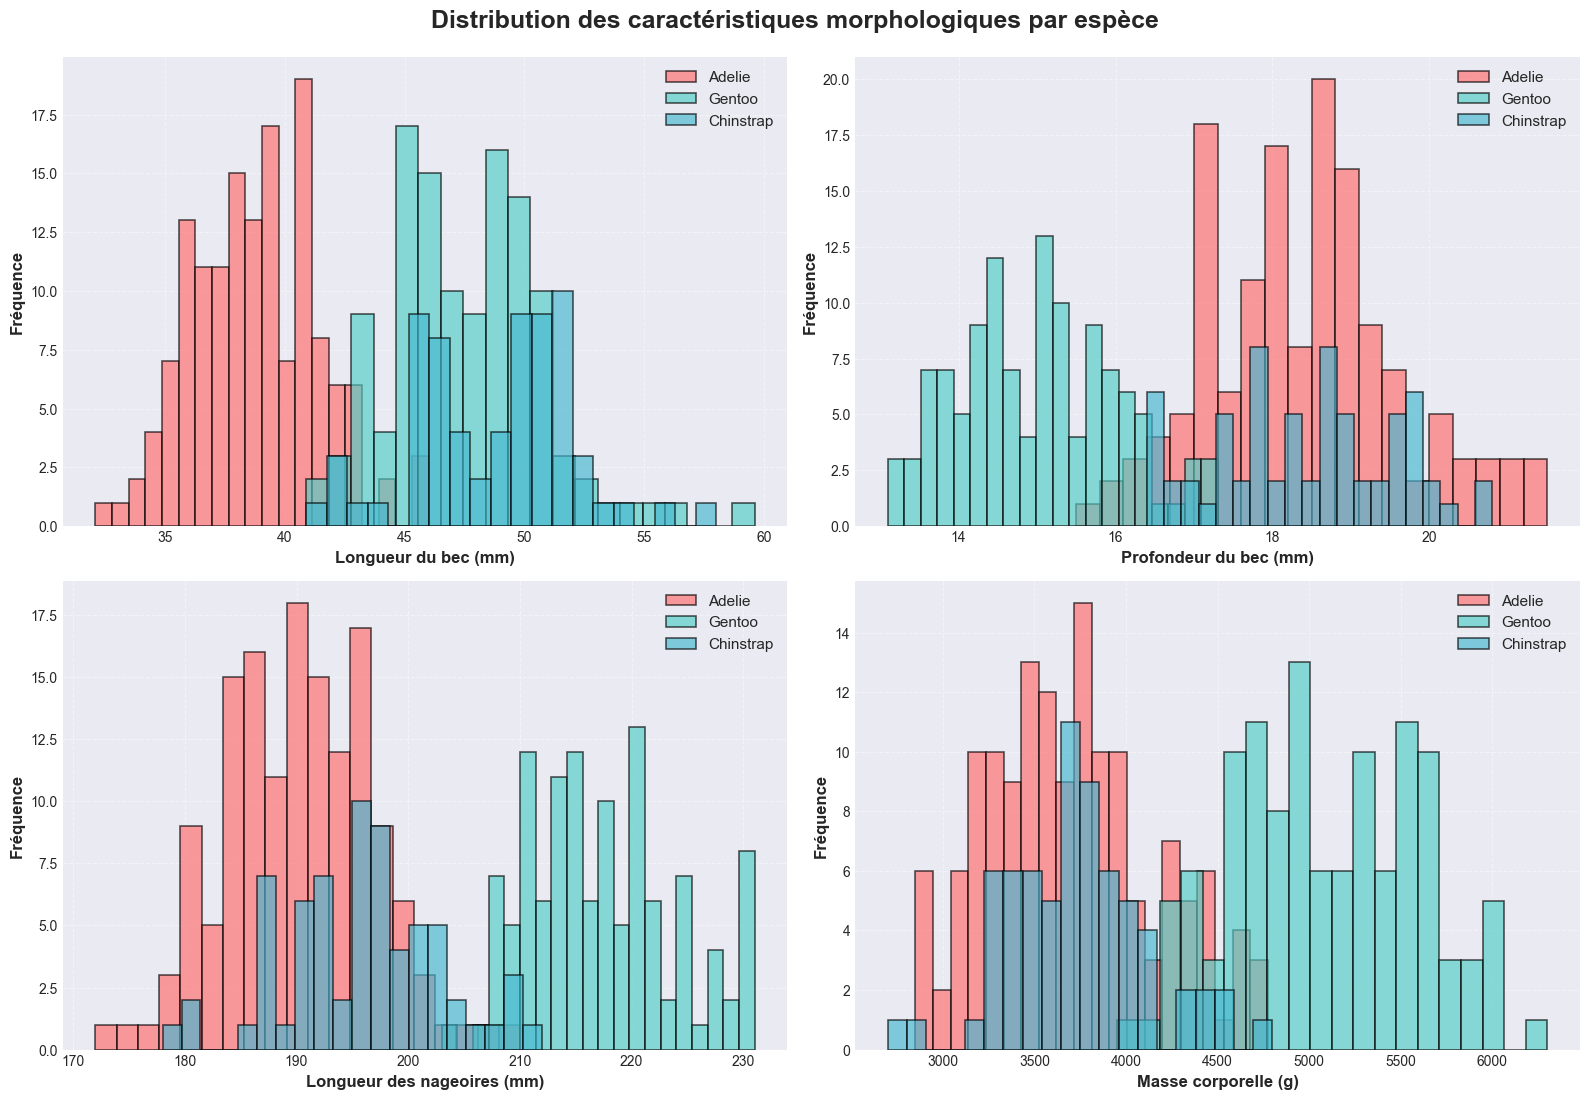

In [3]:
# matrice des entrées (longueur du bec, largueur du bec, longueur des nageoires, poids du corps)
entrees = df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].to_numpy()
sp = ["Adelie","Gentoo","Chinstrap"]

# matrice des sorties (manchot Adélie, manchot Papou, manchot à jugulaire)
sorties = np.zeros([len(df), len(sp)])
for s in range(len(sp)):
    sorties[:, s] = (df.species == sp[s]).to_numpy()

# Visualisation des distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 11))
fig.suptitle("Distribution des caractéristiques morphologiques par espèce", 
             fontsize=18, fontweight='bold', y=0.995)

features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
labels = ["Longueur du bec (mm)", "Profondeur du bec (mm)", 
          "Longueur des nageoires (mm)", "Masse corporelle (g)"]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (feat, label) in enumerate(zip(features, labels)):
    ax = axes[idx // 2, idx % 2]
    for i, species in enumerate(sp):
        data = df[df['species'] == species][feat]
        ax.hist(data, bins=20, alpha=0.65, label=species, color=colors[i], 
                edgecolor='black', linewidth=1.2)
    ax.set_xlabel(label, fontsize=12, fontweight='bold')
    ax.set_ylabel("Fréquence", fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=11, framealpha=0.9)
    ax.grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

Les quatre caractéristiques sont toutes informative pour la classification, mais certaines sont plus discriminantes :
- flipper_length_mm et body_mass_g séparent très bien Gentoo.
- bill_length_mm et bill_depth_mm aident surtout à distinguer Adélie et Chinstrap.

On remarque un certain chevauchement entre Adélie et Chinstrap, ce qui peut expliquer des erreurs dans un modèle simple comme un perceptron monocouche.
Ces observations justifient l’intérêt d’utiliser plusieurs caractéristiques simultanément pour améliorer la classification.


### <a id="sec2-3"></a>2.3 Nécessité du Prétraitement

#### Pourquoi normaliser les données ?

1. Échelles différentes : Les variables ont des unités et des plages de valeurs très différentes
   - Masse corporelle : 2700-6300 g
   - Longueur du bec : 32-60 mm
   
2. Convergence de l'algorithme : Sans normalisation, les attributs avec de grandes valeurs domineraient l'apprentissage

Méthode utilisée : Standardisation (Z-score)

La standardisation est une technique de mise à l'échelle des données qui consiste à transformer chaque attribut pour qu’il ait une moyenne nulle et un écart-type égal à 1.  

Formule : $$x'_i = \frac{x_i - \mu}{\sigma}$$

où :  
- $x_i$ : valeur originale de l'attribut pour l'échantillon $i$  
- $\mu$ : moyenne de l'attribut sur l'ensemble des données  
- $\sigma$ : écart-type de l'attribut sur l'ensemble des données  
- $x'_i$ : valeur standardisée  


#### Pourquoi mélanger aléatoirement les données ?

On mélange les données pour :

1. Éviter les biais d'ordre : Si les données sont triées par espèce, le modèle pourrait apprendre des patterns artificiels liés à l'ordre de présentation.

2. Avoir une répartition équitable : Assurer que les ensembles train/valid/test contiennent des proportions similaires de chaque classe.

In [4]:
# Standardisation
mu = entrees.mean(axis=0)
sigma = entrees.std(axis=0)
entrees_norm = (entrees - mu) / sigma

print("="*80)
print("NORMALISATION DES DONNÉES")
print("="*80)
print(f"Moyennes originales :\n{mu}")
print(f"\nÉcarts-types originaux :\n{sigma}")
print(f"\nAprès normalisation :")
print(f"  Nouvelles moyennes : {entrees_norm.mean(axis=0)}")
print(f"  Nouveaux écarts-types : {entrees_norm.std(axis=0)}")

# Application de la permutation fixe (reproductibilité)
perm = np.loadtxt("randperm0_332.txt", dtype=float).astype(int)
entrees_perm = entrees_norm[perm, :]
sorties_perm = sorties[perm, :]

# Séparation train/valid/test
# Train: 50%, Valid: 26%, Test: 24%
X_train = entrees_perm[:166, :]
Y_train = sorties_perm[:166, :]
X_valid = entrees_perm[166:254, :]
Y_valid = sorties_perm[166:254, :]
X_test = entrees_perm[254:, :]
Y_test = sorties_perm[254:, :]

print("\n" + "="*80)
print("RÉPARTITION DES DONNÉES")
print("="*80)
print(f"Ensemble d'entraînement : {X_train.shape[0]} échantillons ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Ensemble de validation  : {X_valid.shape[0]} échantillons ({X_valid.shape[0]/len(df)*100:.1f}%)")
print(f"Ensemble de test        : {X_test.shape[0]} échantillons ({X_test.shape[0]/len(df)*100:.1f}%)")

# Vérification de la répartition par classe
print("\nRépartition par espèce dans chaque ensemble :")
for i, species in enumerate(sp):
    n_train = Y_train[:, i].sum()
    n_valid = Y_valid[:, i].sum()
    n_test = Y_test[:, i].sum()
    print(f"  {species:10s} - Train: {n_train:.0f}, Valid: {n_valid:.0f}, Test: {n_test:.0f}")

NORMALISATION DES DONNÉES
Moyennes originales :
[  43.99279279   17.16486486  200.96696697 4207.05705706]

Écarts-types originaux :
[  5.46045096   1.96627643  13.99470477 804.00586016]

Après normalisation :
  Nouvelles moyennes : [-1.02420575e-15 -1.28025718e-15  2.56051436e-16 -1.28025718e-16]
  Nouveaux écarts-types : [1. 1. 1. 1.]

RÉPARTITION DES DONNÉES
Ensemble d'entraînement : 166 échantillons (49.8%)
Ensemble de validation  : 88 échantillons (26.4%)
Ensemble de test        : 79 échantillons (23.7%)

Répartition par espèce dans chaque ensemble :
  Adelie     - Train: 78, Valid: 36, Test: 32
  Gentoo     - Train: 57, Valid: 32, Test: 30
  Chinstrap  - Train: 31, Valid: 20, Test: 17


## <a id="sec3"></a>3. Entraînement des Perceptrons

### <a id="sec3-1"></a>3.1 Algorithme de Widrow-Hoff

L'entraînement consiste à optimiser les poids de chaque perceptron par descente de gradient pour minimiser l'erreur quadratique moyenne.

Paramètres d'entraînement :
- Taux d'apprentissage : $\eta = 0.008$ 
- Nombre d'époques : 20

ENTRAÎNEMENT DES PERCEPTRONS
Entraînement terminé après 100 époques
Erreur finale : 0.443003

Dimensions de la matrice des poids : (4, 3)
  → 4 attributs × 3 classes


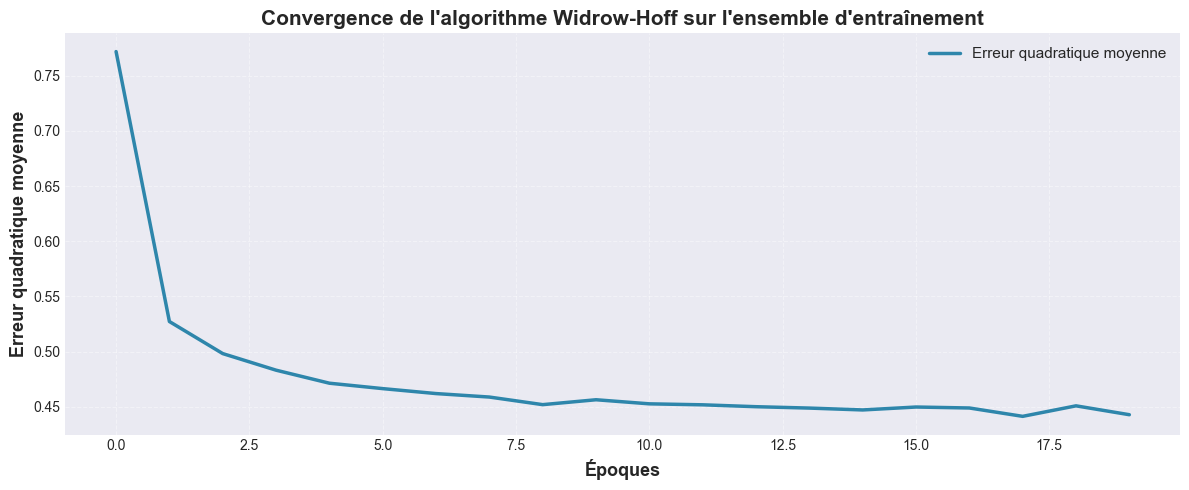

In [5]:
def widrow_hoff(entrees, sorties, taux_apprentissage=0.008, epochs=20):
    """
    Algorithme de Widrow-Hoff pour l'entraînement d'un perceptron monocouche.
    Permet d'entrainer 3 perceptrons en parallele. 
    
    Paramètres:
    -----------
    entrees : array (n_samples, n_features)
        Matrice des données d'entrée normalisées
    sorties : array (n_samples, n_classes)
        Matrice des sorties
    taux_apprentissage : float
        Pas de la descente de gradient
    epochs : int
        Nombre d'itérations sur l'ensemble d'entraînement
        
    Retourne:
    ---------
    matrice_poids : array (n_features, n_classes)
        Poids optimisés pour chaque perceptron
    tab_erreur_moyenne : list
        Historique de l'erreur quadratique moyenne
    """
    nb_exemples, nb_attributs = entrees.shape
    nb_classes = sorties.shape[1]
    
    # Initialisation Xavier : variance = 1/√(nb_attributs)
    facteur_normalisation = 1 / np.sqrt(nb_attributs)
    
    
    matrice_poids = np.random.randn(nb_attributs, nb_classes) * facteur_normalisation
    
    tab_erreur_moyenne = []
    
    for epoch in range(epochs):
        # Mélange des exemples à chaque époque
        perm = np.random.permutation(nb_exemples)
        somme_erreur = 0.0
        
        for exemple in perm:
            x = entrees[exemple, :]
            y_true = sorties[exemple, :]
            
            # Sortie du perceptron (combinaison linéaire)
            y_pred = np.dot(x, matrice_poids)
            
            # Calcul de l'erreur
            erreur = y_true - y_pred
            
            # Mise à jour des poids par descente de gradient
            matrice_poids += taux_apprentissage * np.outer(x, erreur)
            
            somme_erreur += np.sum(erreur**2)
        
        # Erreur quadratique moyenne pour cette époque
        erreur_moyenne = somme_erreur / nb_exemples
        tab_erreur_moyenne.append(erreur_moyenne)
    
    return matrice_poids, tab_erreur_moyenne

# Entraînement
print("="*80)
print("ENTRAÎNEMENT DES PERCEPTRONS")
print("="*80)

W, err_train = widrow_hoff(X_train, Y_train, taux_apprentissage=0.008, epochs=20)

print(f"Entraînement terminé après 100 époques")
print(f"Erreur finale : {err_train[-1]:.6f}")
print(f"\nDimensions de la matrice des poids : {W.shape}")
print(f"  → {W.shape[0]} attributs × {W.shape[1]} classes")

# Visualisation de la convergence
plt.figure(figsize=(12, 5))
plt.plot(err_train, linewidth=2.5, color='#2E86AB', label='Erreur quadratique moyenne')
plt.xlabel("Époques", fontsize=13, fontweight='bold')
plt.ylabel("Erreur quadratique moyenne", fontsize=13, fontweight='bold')
plt.title("Convergence de l'algorithme Widrow-Hoff sur l'ensemble d'entraînement", 
          fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

### <a id="sec3-2"></a>3.2 Calcul des Scores et des Métriques

Pour évaluer la performance, nous calculons :
- Scores : Sorties linéaires des perceptrons (avant seuillage)
- AUC (Area Under Curve) : Aire sous la courbe ROC, mesure la capacité à séparer les classes
- Average Precision (AVP) : Aire sous la courbe Précision-Rappel

Ces métriques sont calculées sur les ensembles de validation et de test.

In [6]:
def compute_scores(X, W):
    """Calcule les scores (sorties linéaires) pour chaque classe."""
    return np.dot(X, W)

def ROC(y_true, scores):
    """
    Calcule la courbe ROC et l'AUC.
    
    Paramètres:
    -----------
    y_true : array (n_samples,)
        0 ou 1
    scores : array (n_samples,)
        Scores de prédiction (plus le score est élevé, plus la prédiction est positive)
        
    Retourne:
    ---------
    fp_r : array
        Taux de faux positifs
    tp_r : array
        Taux de vrais positifs
    auc : float
        Aire sous la courbe ROC
    """
    # Tri par scores décroissants
    sorted_indices = np.argsort(-scores)
    y_sorted = y_true[sorted_indices]
    
    # Nombre de positifs et négatifs
    n_pos = np.sum(y_true == 1)
    n_neg = np.sum(y_true == 0)
    
    if n_pos == 0 or n_neg == 0:
        return np.array([0, 1]), np.array([0, 1]), 0.5
    
    # Calcul cumulé des TP et FP
    tp = np.cumsum(y_sorted)
    fp = np.cumsum(1 - y_sorted)
    
    # Calcul des taux
    tp_r = np.concatenate([[0], tp / n_pos])
    fp_r = np.concatenate([[0], fp / n_neg])
    
    # Calcul de l'AUC par la méthode des trapèzes
    auc = np.trapezoid(tp_r, fp_r)
    
    return fp_r, tp_r, auc

def PR(y_true, scores):
    """
    Calcule la courbe Précision-Rappel et l'Average Precision.
    
    Paramètres:
    -----------
    y_true : array (n_samples,)
        0 ou 1
    scores : array (n_samples,)
        Scores de prédiction
        
    Retourne:
    ---------
     Rappel : array
        Valeurs de rappel
    precision : array
        Valeurs de précision
    ap : float
        Average Precision (aire sous la courbe PR)
    """
    sorted_indices = np.argsort(-scores)
    y_sorted = y_true[sorted_indices]
    
    n_pos = np.sum(y_true == 1)
    if n_pos == 0:
        return np.array([0, 1]), np.array([1, 0]), 0.0
    
    tp = np.cumsum(y_sorted)
    fp = np.cumsum(1 - y_sorted)
    
    precision = tp / (tp + fp + 1e-10)
    recall = tp / n_pos
    
    # Calcul de l'Average Precision (méthode d'intégration correcte)
    # On ajoute les points (0, precision[0]) et on calcule l'aire
    recall_with_zero = np.concatenate([[0],  recall])
    precision_with_first = np.concatenate([[precision[0] if len(precision) > 0 else 1], precision])
    
    # L'AP est l'aire sous la courbe PR (intégration par trapèzes)
    # diff(recall) donne les largeurs des rectangles
    # on multiplie par les précisions correspondantes
    ap = np.sum(np.diff(recall_with_zero) * precision_with_first[:-1])
    
    return  recall, precision, ap

# Calcul des scores sur validation et test
scores_valid = compute_scores(X_valid, W)
scores_test = compute_scores(X_test, W)

# Calcul des métriques pour chaque classe
auc_valid = []
auc_test = []
ap_valid = []
ap_test = []

roc_curves_valid = []
roc_curves_test = []
pr_curves_valid = []
pr_curves_test = []

print("\n" + "="*80)
print("CALCUL DES AUC ET AVERAGE PRECISION PAR CLASSE")
print("="*80)

for i, species in enumerate(sp):
    # Courbes ROC et calcul de l'AUC
    fpr_v, tpr_v, auc_v = ROC(Y_valid[:, i], scores_valid[:, i])
    fpr_t, tpr_t, auc_t = ROC(Y_test[:, i], scores_test[:, i])
    
    auc_valid.append(auc_v)
    auc_test.append(auc_t)
    roc_curves_valid.append((fpr_v, tpr_v))
    roc_curves_test.append((fpr_t, tpr_t))
    
    # Courbes PR et calcul de l'AP
    recall_v, prec_v, ap_v = PR(Y_valid[:, i], scores_valid[:, i])
    recall_t, prec_t, ap_t = PR(Y_test[:, i], scores_test[:, i])
    
    ap_valid.append(ap_v)
    ap_test.append(ap_t)
    pr_curves_valid.append((recall_v, prec_v))
    pr_curves_test.append((recall_t, prec_t))
    
    print(f"\n{species:12s}:")
    print(f"  AUC (validation) : {auc_v:.4f}   |   AUC (test) : {auc_t:.4f}")
    print(f"  AP  (validation) : {ap_v:.4f}   |   AP  (test) : {ap_t:.4f}")

# Calcul des moyennes
mauc_valid = np.mean(auc_valid)
mauc_test = np.mean(auc_test)
map_valid = np.mean(ap_valid)
map_test = np.mean(ap_test)

print("\n" + "="*80)
print("MOYENNES SUR LES TROIS CLASSES (MAUC et MAP)")
print("="*80)
print(f"MAUC (validation) : {mauc_valid:.4f}   |   MAUC (test) : {mauc_test:.4f}")
print(f"MAP  (validation) : {map_valid:.4f}   |   MAP  (test) : {map_test:.4f}")



CALCUL DES AUC ET AVERAGE PRECISION PAR CLASSE

Adelie      :
  AUC (validation) : 0.9968   |   AUC (test) : 1.0000
  AP  (validation) : 0.9956   |   AP  (test) : 1.0000

Gentoo      :
  AUC (validation) : 1.0000   |   AUC (test) : 1.0000
  AP  (validation) : 1.0000   |   AP  (test) : 1.0000

Chinstrap   :
  AUC (validation) : 0.9860   |   AUC (test) : 0.9924
  AP  (validation) : 0.9558   |   AP  (test) : 0.9732

MOYENNES SUR LES TROIS CLASSES (MAUC et MAP)
MAUC (validation) : 0.9943   |   MAUC (test) : 0.9975
MAP  (validation) : 0.9838   |   MAP  (test) : 0.9911


### <a id="sec3-3"></a> 3.3 Tableau Récapitulatif des Métriques

Le tableau suivant résume les 6 valeurs d'AUC (3 classes × 2 ensembles) ainsi que les 6 valeurs d'AP.

In [7]:
results_df = pd.DataFrame({
    'Espèce': sp,
    'AUC (Valid)': [f"{auc:.4f}" for auc in auc_valid],
    'AUC (Test)': [f"{auc:.4f}" for auc in auc_test],
    'AP (Valid)': [f"{ap:.4f}" for ap in ap_valid],
    'AP (Test)': [f"{ap:.4f}" for ap in ap_test]
})

print("\n" + "="*80)
print("TABLEAU RÉCAPITULATIF DES PERFORMANCES")
print("="*80)
print(results_df.to_string(index=False))
print("\n" + "-"*80)
print(f"{'MOYENNES':12s}  {mauc_valid:7.4f}      {mauc_test:7.4f}     {map_valid:7.4f}     {map_test:7.4f}")
print("="*80)


TABLEAU RÉCAPITULATIF DES PERFORMANCES
   Espèce AUC (Valid) AUC (Test) AP (Valid) AP (Test)
   Adelie      0.9968     1.0000     0.9956    1.0000
   Gentoo      1.0000     1.0000     1.0000    1.0000
Chinstrap      0.9860     0.9924     0.9558    0.9732

--------------------------------------------------------------------------------
MOYENNES       0.9943       0.9975      0.9838      0.9911


Les valeurs moyennes très proches de 1 indiquent que les 3 classes sont séparables linéairement par rapport aux données de leur attributs.

## <a id="sec4"></a> 4. Analyse des Courbes ROC

### <a id="sec4-1"></a>4.1 Qu'est-ce qu'une courbe ROC ?

La courbe ROC (Receiver Operating Characteristic) représente le compromis entre :
-  TPR (True Positive Rate)  ou  *Sensibilité*  : proportion de vrais positifs correctement identifiés
-  FPR (False Positive Rate) (= 1 - *Spécifité*)  : proportion de faux positifs incorrectement identifiés

$$\text{TPR} = \frac{TP}{TP + FN} \quad ; \quad \text{FPR} = \frac{FP}{FP + TN} = \text{1 - Spécifité} = 1 - \frac{TN}{FP + TN}$$

L' AUC (Area Under Curve)  mesure la surface sous la courbe ROC :
-  AUC = 1  : classifieur parfait
-  AUC = 0.5  : classifieur aléatoire
-  AUC < 0.5  : pire qu'un classifieur aléatoire

### <a id="sec4-2"></a>4.2 Présentation des Courbes ROC

Nous présentons les courbes ROC pour les  trois classes  (Y₁, Y₂, Y₃) sur les ensembles de  validation  et de  test .

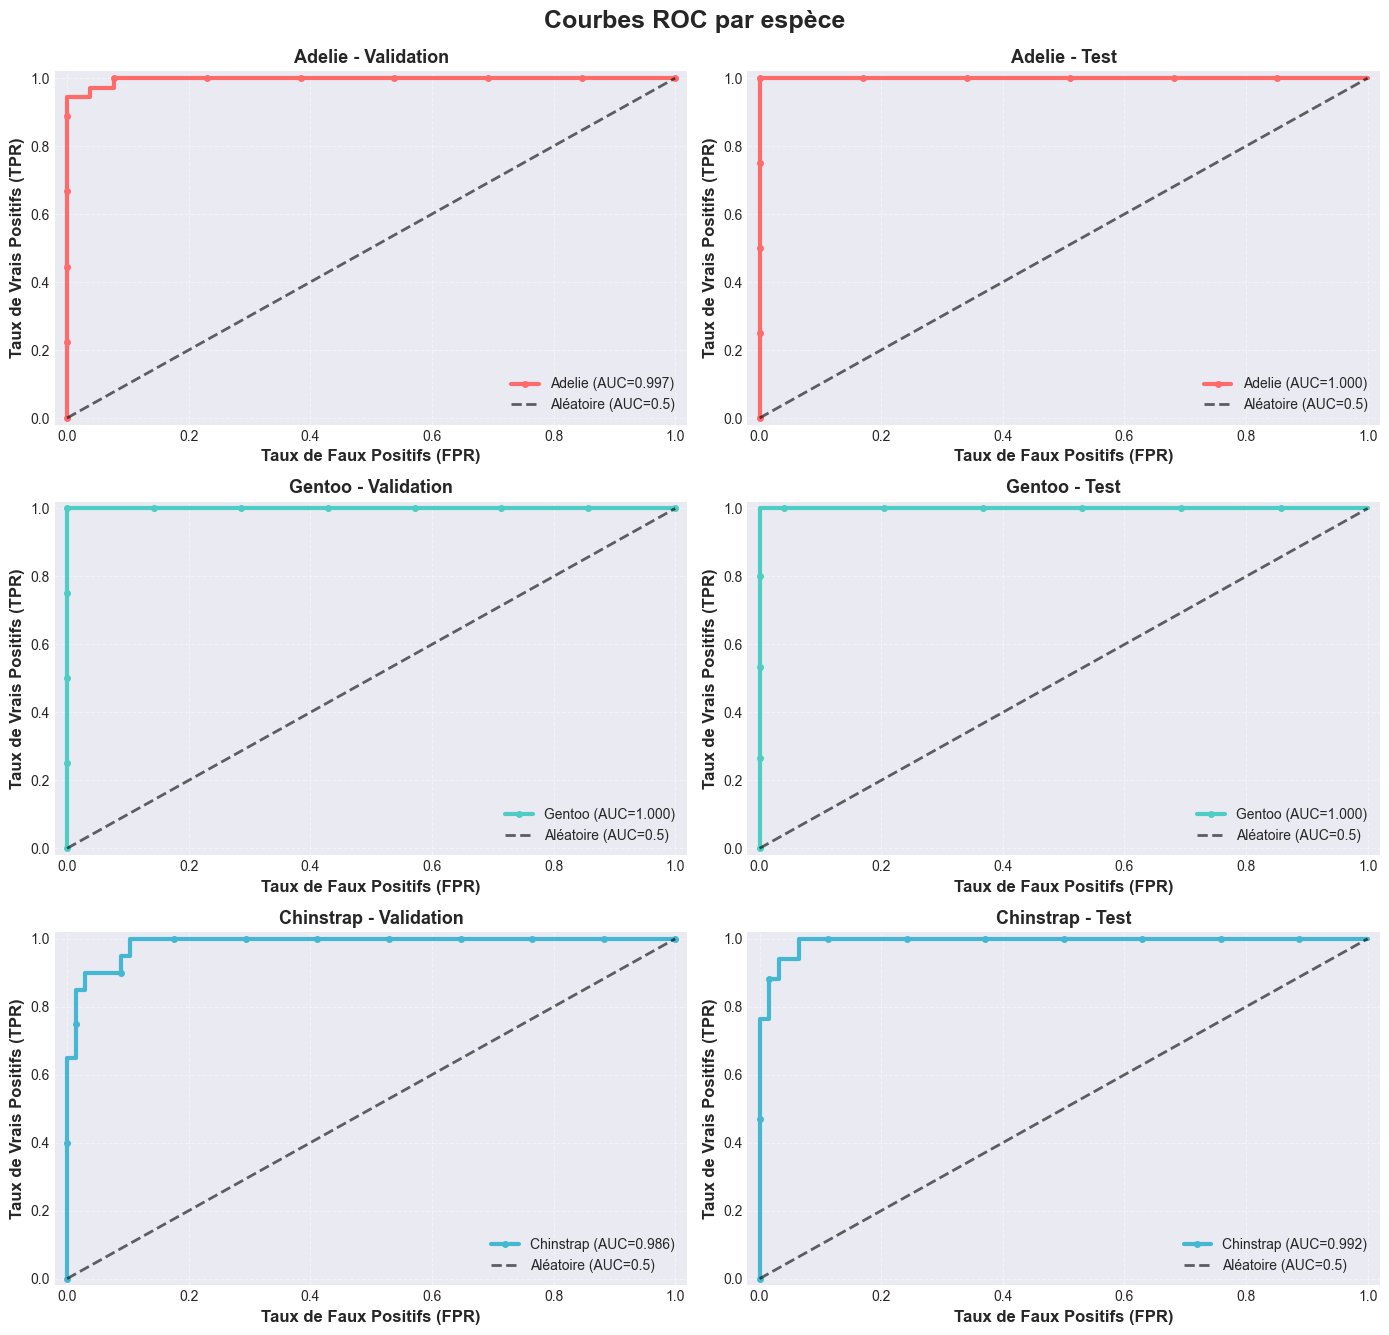

In [8]:
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

fig, axes = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle("Courbes ROC par espèce", fontsize=18, fontweight='bold', y=0.95)

for i, species in enumerate(sp):
    # Courbes ROC - Validation
    fp_r, tp_r = roc_curves_valid[i]
    ax = axes[i, 0]
    ax.plot(fp_r, tp_r, linewidth=3, label=f'{species} (AUC={auc_valid[i]:.3f})',
            color=colors[i], marker='o', markersize=4, markevery=max(1, len(fp_r)//10))
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Aléatoire (AUC=0.5)')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Validation', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])

    # Courbes ROC - Test
    fp_r, tp_r = roc_curves_test[i]
    ax = axes[i, 1]
    ax.plot(fp_r, tp_r, linewidth=3, label=f'{species} (AUC={auc_test[i]:.3f})',
            color=colors[i], marker='o', markersize=4, markevery=max(1, len(fp_r)//10))
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Aléatoire (AUC=0.5)')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Test', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### <a id="sec4-3"></a>4.3 Interprétation des Courbes ROC

- Les AUC sur l'ensemble de test sont généralement  légèrement inférieures  aux AUC sur la validation, ce qui est attendu et indique un léger surapprentissage. 
La différence entre validation et test reflète la capacité du modèle à  généraliser  sur de nouvelles données. Un écart trop important signalerait un surapprentissage marqué.

- Les trois espèces sont relativement bien séparées
- Certaines classes peuvent être plus faciles à discriminer que d'autres


## <a id="sec5"></a>5. Courbes Précision-Rappel et Average Precision

### <a id="sec5-1"></a> 5.1 Qu'est-ce qu'une courbe Précision-Rappel ?

La  courbe Précision-Rappel  (PR curve) est particulièrement utile pour les  classes déséquilibrées .

 Définitions : 
-  Précision  : Proportion de prédictions positives qui sont correctes
  $\text{Precision} = \frac{TP}{TP + FP}$

-  Rappel  (ou Sensibilité) : Proportion de vrais positifs détectés
  $\text{ Rappel} = \frac{TP}{TP + FN}$

L' Average Precision (AVP)  est l'aire sous la courbe PR. Elle résume la performance sur tous les seuils de décision.

### <a id="sec5-2"></a>5.2 Intérêt pour les classes déséquilibrées

Contrairement à la courbe ROC qui utilise le FPR (sensible aux vrais négatifs abondants), la courbe PR se focalise sur les  prédictions positives . Elle est donc plus informative quand une classe est minoritaire.

### <a id="sec5-3"></a>5.3 Présentation des Courbes Précision-Rappel

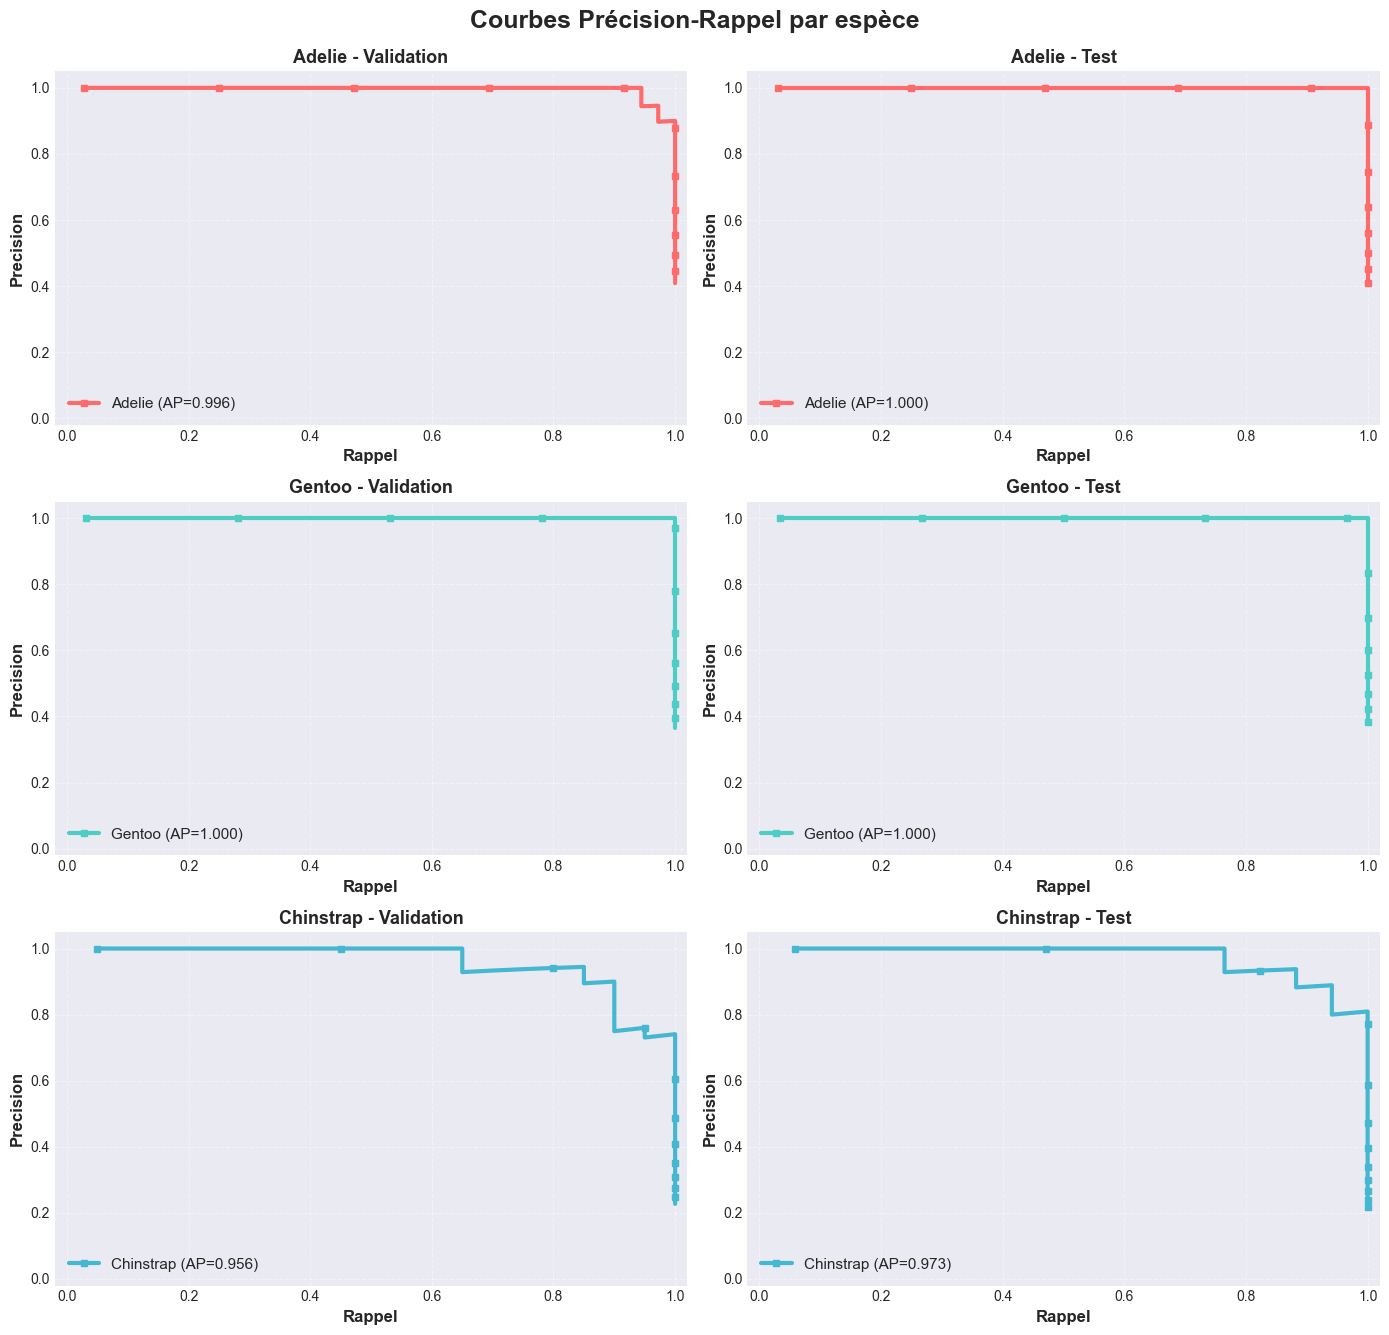

In [9]:
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

fig, axes = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle("Courbes Précision-Rappel par espèce", fontsize=18, fontweight='bold', y=0.95)

for i, species in enumerate(sp):
    # Validation
    recall, precision = pr_curves_valid[i]
    ax = axes[i, 0]
    ax.plot(recall, precision, linewidth=3, label=f'{species} (AP={ap_valid[i]:.3f})',
            color=colors[i], marker='s', markersize=4, markevery=max(1, len(recall)//10))
    ax.set_xlabel('Rappel', fontsize=12, fontweight='bold')
    ax.set_ylabel('Precision', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Validation', fontsize=13, fontweight='bold')
    ax.legend(loc='lower left', fontsize=11, framealpha=0.95)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.05])

    # Test
    recall, precision = pr_curves_test[i]
    ax = axes[i, 1]
    ax.plot(recall, precision, linewidth=3, label=f'{species} (AP={ap_test[i]:.3f})',
            color=colors[i], marker='s', markersize=4, markevery=max(1, len(recall)//10))
    ax.set_xlabel('Rappel', fontsize=12, fontweight='bold')
    ax.set_ylabel('Precision', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Test', fontsize=13, fontweight='bold')
    ax.legend(loc='lower left', fontsize=11, framealpha=0.95)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.05])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### <a id="sec5-4"></a>5.4 Interprétation des Courbes PR

Comme les classes sont bien séparables, on obtient des courbes PR proches du coin supérieur droit indiquant une bonne performance.
On a une différence faible entre Valid et Test, donc on suppose que notre perceptron a bien appris a généraliser sur des données qu'il n'a jamais vu.


## <a id="sec6"></a>6. Discussion et Conclusion

### <a id="sec6-1"></a>6.1 Comparaison des performances entre Validation et Test

Analysons les différences de performance entre les ensembles de validation et de test.

In [10]:
print("="*80)
print("ANALYSE COMPARATIVE : VALIDATION vs TEST")
print("="*80)

print("\n1. COMPARAISON PAR CLASSE")
print("-" * 80)

for i, species in enumerate(sp):
    diff_auc = auc_valid[i] - auc_test[i]
    diff_ap = ap_valid[i] - ap_test[i]
    print(f"\n{species}:")
    print(f"  Δ AUC (valid - test) : {diff_auc:+.4f}") 
    print(f"  Δ AP  (valid - test) : {diff_ap:+.4f}")

print("\n" + "-" * 80)
print("\n2. MOYENNES GLOBALES")
print("-" * 80)

diff_mauc = mauc_valid - mauc_test
diff_map = map_valid - map_test

print(f"\nΔ MAUC (valid - test) : {diff_mauc:+.4f}")
print(f"Δ MAP  (valid - test) : {diff_map:+.4f}")
    


ANALYSE COMPARATIVE : VALIDATION vs TEST

1. COMPARAISON PAR CLASSE
--------------------------------------------------------------------------------

Adelie:
  Δ AUC (valid - test) : -0.0032
  Δ AP  (valid - test) : -0.0044

Gentoo:
  Δ AUC (valid - test) : +0.0000
  Δ AP  (valid - test) : +0.0000

Chinstrap:
  Δ AUC (valid - test) : -0.0064
  Δ AP  (valid - test) : -0.0174

--------------------------------------------------------------------------------

2. MOYENNES GLOBALES
--------------------------------------------------------------------------------

Δ MAUC (valid - test) : -0.0032
Δ MAP  (valid - test) : -0.0073


Les écarts très faibles entre validation et test montrent que le modèle ne souffre pas de surapprentissage et reste fiable sur des données indépendantes.

### <a id="sec6-2"></a>6.2 Comparaison MAP vs MAUC

Analysons maintenant la différence entre les deux métriques globales : MAP** et **MAUC**.


ANALYSE COMPARATIVE : MAP vs MAUC

1. COMPARAISON DES MÉTRIQUES
--------------------------------------------------------------------------------

Sur l'ensemble de VALIDATION :
  MAP  = 0.9838
  MAUC = 0.9943
  Écart (MAP - MAUC) = -0.0105

Sur l'ensemble de TEST :
  MAP  = 0.9911
  MAUC = 0.9975
  Écart (MAP - MAUC) = -0.0064


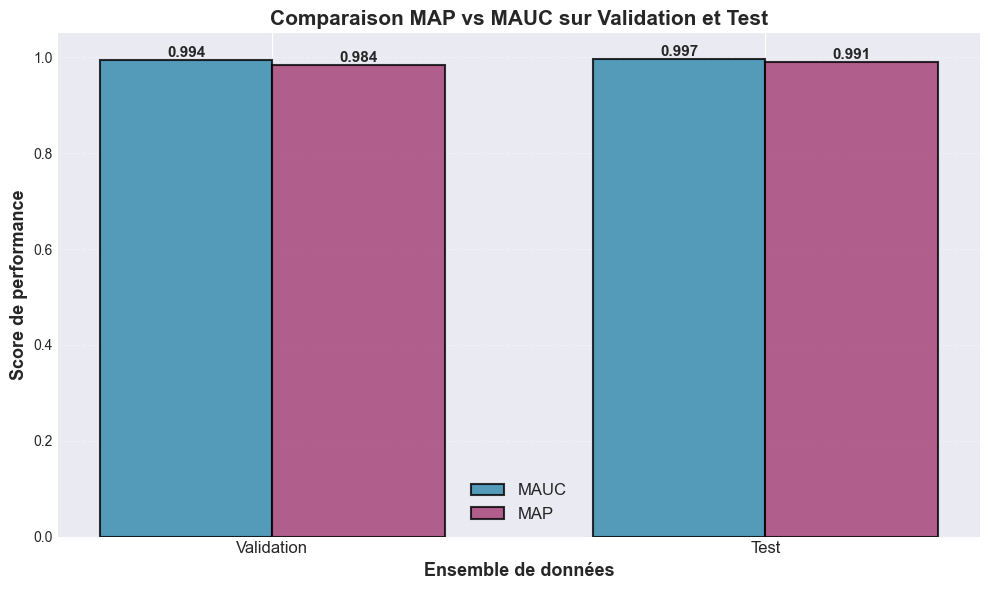

In [11]:
print("\n" + "="*80)
print("ANALYSE COMPARATIVE : MAP vs MAUC")
print("="*80)

print("\n1. COMPARAISON DES MÉTRIQUES")
print("-" * 80)

ecart_valid = map_valid - mauc_valid
ecart_test = map_test - mauc_test

print(f"\nSur l'ensemble de VALIDATION :")
print(f"  MAP  = {map_valid:.4f}")
print(f"  MAUC = {mauc_valid:.4f}")
print(f"  Écart (MAP - MAUC) = {ecart_valid:+.4f}")

print(f"\nSur l'ensemble de TEST :")
print(f"  MAP  = {map_test:.4f}")
print(f"  MAUC = {mauc_test:.4f}")
print(f"  Écart (MAP - MAUC) = {ecart_test:+.4f}")

# Visualisation comparative
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x = np.arange(2)
width = 0.35

bars1 = ax.bar(x - width/2, [mauc_valid, mauc_test], width, label='MAUC', 
               color='#2E86AB', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, [map_valid, map_test], width, label='MAP', 
               color='#A23B72', alpha=0.8, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Ensemble de données', fontsize=13, fontweight='bold')
ax.set_ylabel('Score de performance', fontsize=13, fontweight='bold')
ax.set_title('Comparaison MAP vs MAUC sur Validation et Test', fontsize=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(['Validation', 'Test'], fontsize=12)
ax.legend(fontsize=12, framealpha=0.95)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.set_ylim([0, 1.05])

# Ajout des valeurs sur les barres
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Différence entre MAP et MAUC : 

La différence entre MAP et MAUC s'explique par la nature des courbes utilisées :

1. Courbe ROC (MAUC) :
   - Utilise le FPR = FP / (FP + TN)
   - Prend en compte les Vrais Négatifs (TN)
   - Pénalisée par les Faux Positifs dans un grand ensemble de négatifs
   
2. Courbe PR (MAP) :
   - Utilise la Précision = TP / (TP + FP)
   - Ignore alors les Vrais Négatifs (TN)
   - Se focalise uniquement sur les prédictions positives

Dans notre cas (3 classes en approche 1vsALL) :
- Pour chaque perceptron, il y a plus de négatifs que de positifs
- Les courbes ROC sont "tirées vers le bas" par les nombreux TN
- Les courbes PR ignorent ces TN et paraissent donc plus optimistes

Donc comme MAP ne reflète que la performance sur les prédictions positives,
alors que le MAUC donne une vue d'ensemble plus équilibrée incluant
la capacité à rejeter correctement les négatifs.

Cependant, ici on a apparement un problème multi-classes déséquilibré : la proportion de positifs vs négatifs pour chaque perceptron n’est pas équilibrée, ce qui explique pourquoi MAP < MAUC alors que normalement MAP > MAUC.



In [12]:

# ### 6.3 Performance par classe

# Identifions quelle espèce est la mieux classée et laquelle pose le plus de difficultés.

# print("\n" + "="*80)
# print("ANALYSE DE PERFORMANCE PAR CLASSE")
# print("="*80)

# # Identification des meilleures et pires classes
# best_auc_idx = np.argmax(auc_test)
# worst_auc_idx = np.argmin(auc_test)
# best_ap_idx = np.argmax(ap_test)
# worst_ap_idx = np.argmin(ap_test)

# print(f"\nMEILLEURE CLASSE (selon AUC test) : {sp[best_auc_idx]}")
# print(f"   AUC = {auc_test[best_auc_idx]:.4f}")
# print(f"   AP  = {ap_test[best_auc_idx]:.4f}")

# print(f"\nCLASSE LA PLUS DIFFICILE (selon AUC test) : {sp[worst_auc_idx]}")
# print(f"   AUC = {auc_test[worst_auc_idx]:.4f}")
# print(f"   AP  = {ap_test[worst_auc_idx]:.4f}")

# print("\n" + "-" * 80)
# print("\nCLASSEMENT PAR AUC (Test) :")
# sorted_indices = np.argsort(auc_test)[::-1]
# for rank, idx in enumerate(sorted_indices, 1):
#     print(f"  {rank}. {sp[idx]:12s} - AUC = {auc_test[idx]:.4f}, AP = {ap_test[idx]:.4f}")

# # Visualisation des performances par classe
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# x = np.arange(len(sp))
# width = 0.2

# bars1 = ax.bar(x - 1.5*width, auc_valid, width, label='AUC Valid', 
#                color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=1.2)
# bars2 = ax.bar(x - 0.5*width, auc_test, width, label='AUC Test', 
#                color='#45B7D1', alpha=0.8, edgecolor='black', linewidth=1.2)
# bars3 = ax.bar(x + 0.5*width, ap_valid, width, label='AP Valid', 
#                color='#FF6B6B', alpha=0.8, edgecolor='black', linewidth=1.2)
# bars4 = ax.bar(x + 1.5*width, ap_test, width, label='AP Test', 
#                color='#C44569', alpha=0.8, edgecolor='black', linewidth=1.2)

# ax.set_xlabel('Espèce de manchot', fontsize=13, fontweight='bold')
# ax.set_ylabel('Score de performance', fontsize=13, fontweight='bold')
# ax.set_title('Performances détaillées par classe et par métrique', fontsize=15, fontweight='bold')
# ax.set_xticks(x)
# ax.set_xticklabels(sp, fontsize=12)
# ax.legend(fontsize=11, loc='lower right', framealpha=0.95, ncol=2)
# ax.grid(True, alpha=0.3, axis='y', linestyle='--')
# ax.set_ylim([0, 1.05])

# # Ligne de référence à 0.5 (performance aléatoire)
# ax.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='Référence aléatoire')

# plt.tight_layout()
# plt.show()



## <a id="sec7"></a>7. Ajout de bruit dans les données et impact sur les performances

In [13]:
import copy
import numpy as np
import matplotlib.pyplot as plt

# --- Fonctions de bruit ---
def add_label_noise(Y, taux_bruit=0.1, seed=None):
    """
    Ajoute du bruit sur les labels (changement aléatoire pour un pourcentage donné d'échantillons).
    """
    if seed is not None:
        np.random.seed(seed)
    Y_noisy = copy.deepcopy(Y)
    n_samples, n_classes = Y.shape
    n_bruit = int(n_samples * taux_bruit)
    indices = np.random.choice(n_samples, n_bruit, replace=False)
    for idx in indices:
        true_class = np.argmax(Y_noisy[idx])
        new_class = np.random.choice([c for c in range(n_classes) if c != true_class])
        Y_noisy[idx] = np.zeros(n_classes)
        Y_noisy[idx, new_class] = 1
    return Y_noisy

def add_feature_noise(X, amplitude=0.2, seed=None, per_feature=True):
    """
    Ajoute un bruit multiplicatif uniforme aux attributs.
    Chaque élément est modifié ainsi : X_noisy = X * (1 + r) avec r ~ Uniform(-amplitude, +amplitude).

    Paramètres :
      - X : array (n_samples, n_features)
      - amplitude : float, amplitude relative maximale (ex: 0.2 pour ±20%)
      - seed : int ou None pour reproductibilité
      - per_feature : bool, si True on tire un bruit par attribut (même bruit pour tous les échantillons)

    Retour :
      - X_noisy : array de même forme que X
    """
    if seed is not None:
        np.random.seed(seed)

    if per_feature:
        # bruit par attribut, identique pour tous les exemples
        noise = np.random.uniform(-amplitude, amplitude, size=(1, X.shape[1]))
        noise = np.repeat(noise, X.shape[0], axis=0)
    else:
        # bruit par élément (échantillon × attribut)
        noise = np.random.uniform(-amplitude, amplitude, size=X.shape)

    return X * (1.0 + noise)

## <a id="sec7-1"></a>7.1 Test : bruit uniquement sur Test set


ENTRAÎNEMENT ET TEST AVEC BRUIT
Adelie       : AUC = 1.000 | AP = 1.000
Gentoo       : AUC = 1.000 | AP = 1.000
Chinstrap    : AUC = 0.984 | AP = 0.937

MAUC(test bruité train+test) : 0.995
MAP(test bruité train+test)  : 0.979


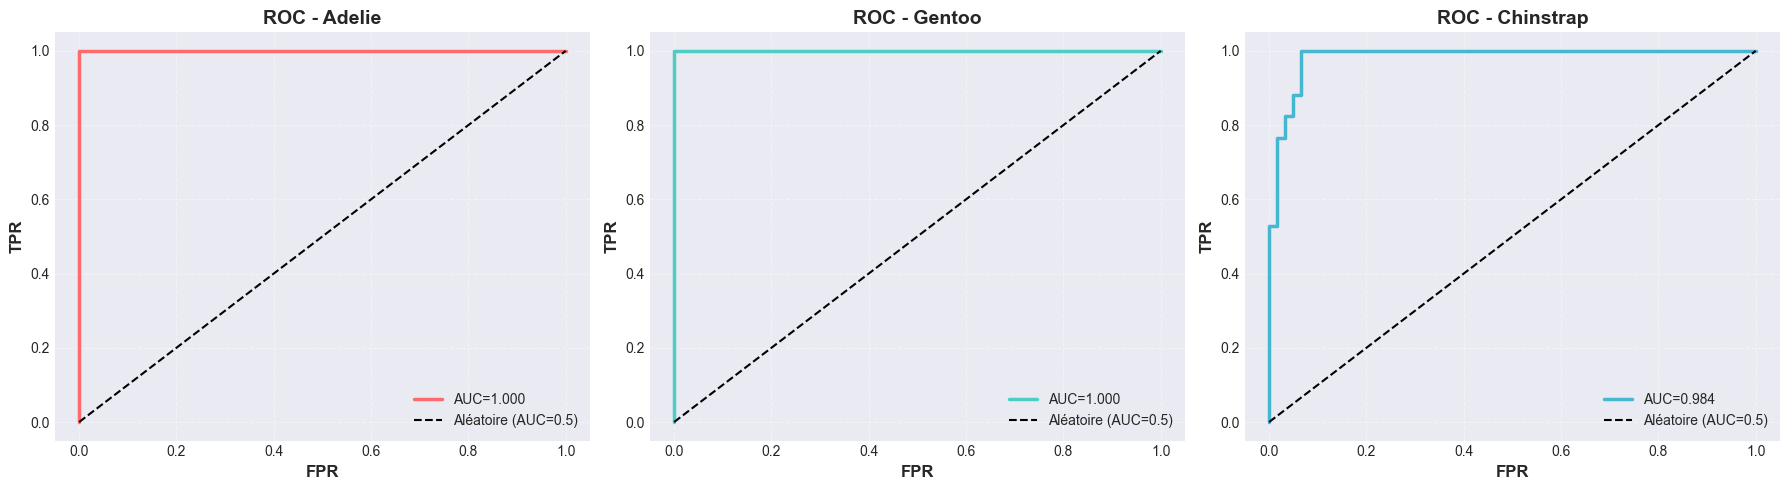

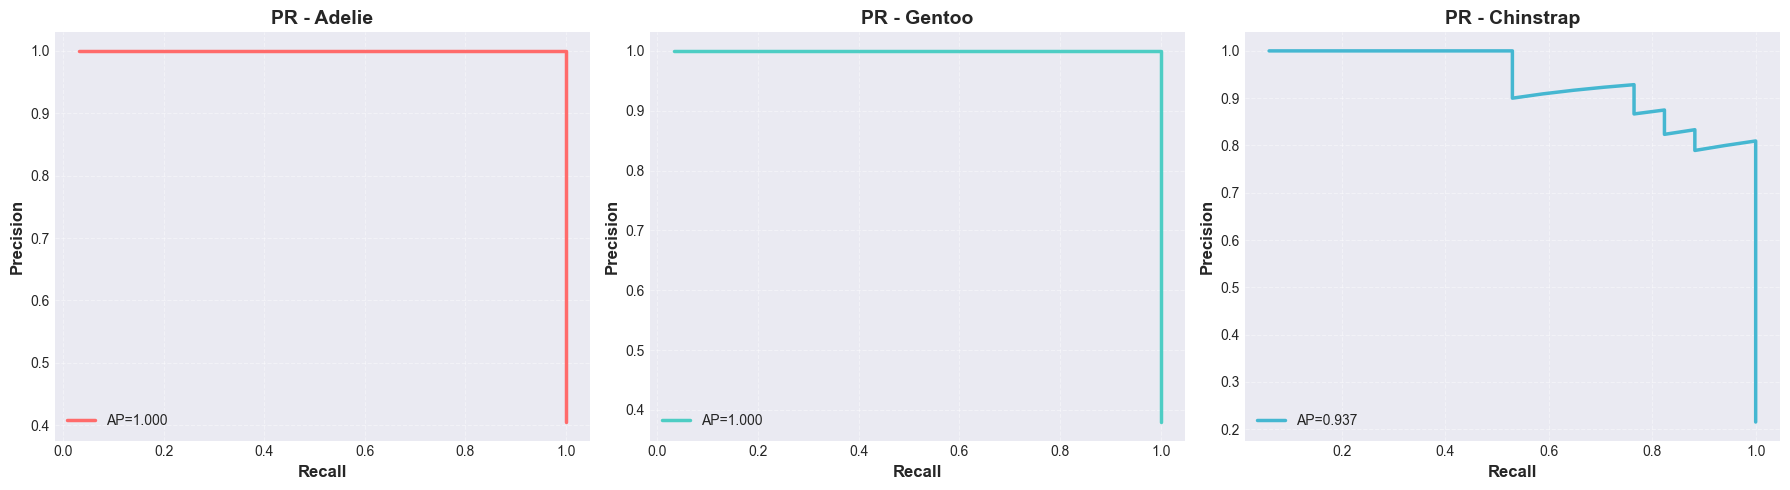

In [14]:
# --- Ajout de bruit sur le Test ---
Y_test_noisy = add_label_noise(Y_test, taux_bruit=0, seed=42)
X_test_noisy = add_feature_noise(X_test, amplitude=0.8, seed=42, per_feature=True)

# --- Calcul des scores avec le modèle entraîné sur les données propres ---
scores_test_noisy = compute_scores(X_test_noisy, W)

# --- Calcul des métriques ---
auc_test_noisy = []
ap_test_noisy = []
roc_curves_test_noisy = []
pr_curves_test_noisy = []

for i, species in enumerate(sp):
    fpr, tpr, auc_val = ROC(Y_test_noisy[:, i], scores_test_noisy[:, i])
    recall, precision, ap_val = PR(Y_test_noisy[:, i], scores_test_noisy[:, i])
    auc_test_noisy.append(auc_val)
    ap_test_noisy.append(ap_val)
    roc_curves_test_noisy.append((fpr, tpr))
    pr_curves_test_noisy.append((recall, precision))
    
print("\n" + "="*80)
print("ENTRAÎNEMENT ET TEST AVEC BRUIT")
print("="*80)
for i, species in enumerate(sp):
    print(f"{species:12s} : AUC = {auc_test_noisy[i]:.3f} | AP = {ap_test_noisy[i]:.3f}")
print(f"\nMAUC(test bruité train+test) : {np.mean(auc_test_noisy):.3f}")
print(f"MAP(test bruité train+test)  : {np.mean(ap_test_noisy):.3f}")

# --- Visualisation ROC par classe ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, species in enumerate(sp):
    fpr, tpr = roc_curves_test_noisy[i]
    axes[i].plot(fpr, tpr, linewidth=2.5, label=f'AUC={auc_test_noisy[i]:.3f}', color=colors[i])
    axes[i].plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC=0.5)')
    axes[i].set_xlabel('FPR', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('TPR', fontsize=12, fontweight='bold')
    axes[i].set_title(f'ROC - {species}', fontsize=14, fontweight='bold')
    axes[i].legend(loc='lower right')
    axes[i].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# --- Visualisation PR par classe ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, species in enumerate(sp):
    recall, precision = pr_curves_test_noisy[i]
    axes[i].plot(recall, precision, linewidth=2.5, label=f'AP={ap_test_noisy[i]:.3f}', color=colors[i])
    axes[i].set_xlabel('Recall', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Precision', fontsize=12, fontweight='bold')
    axes[i].set_title(f'PR - {species}', fontsize=14, fontweight='bold')
    axes[i].legend(loc='lower left')
    axes[i].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## <a id="sec7-2"></a>7.2 Train + Test bruités


ENTRAÎNEMENT ET TEST AVEC BRUIT
Adelie       : AUC = 0.938 | AP = 0.913
Gentoo       : AUC = 1.000 | AP = 1.000
Chinstrap    : AUC = 0.493 | AP = 0.177

MAUC(test bruité train+test) : 0.810
MAP(test bruité train+test)  : 0.697


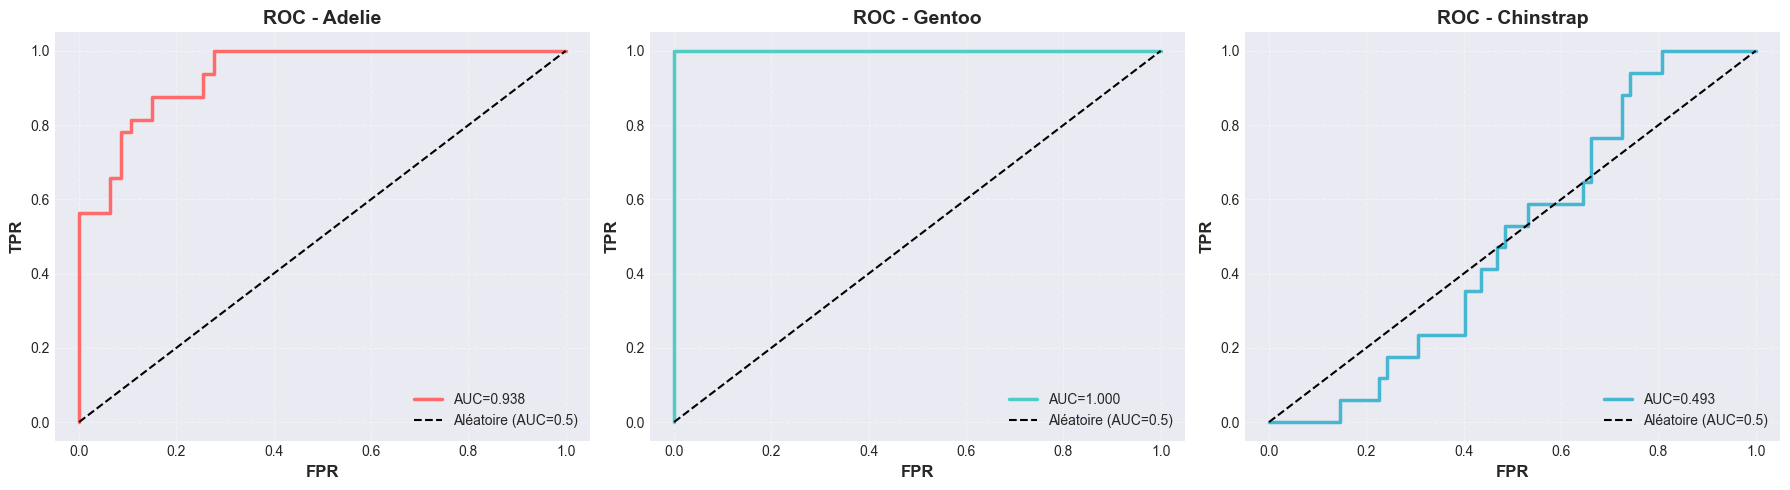

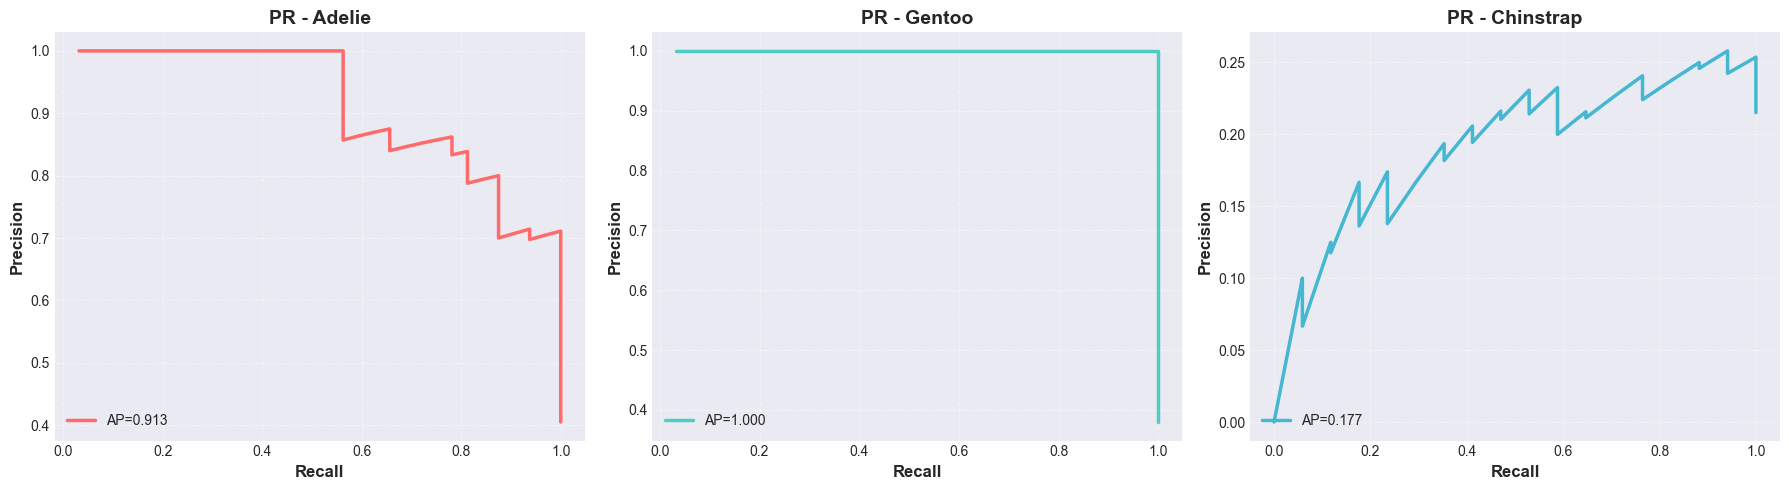

In [15]:
# Bruit d'amplitude à 1.2

Y_train_noisy = add_feature_noise(Y_test, amplitude=1.2, seed=123, per_feature=True)
X_train_noisy = add_feature_noise(X_test, amplitude=1.2, seed=123, per_feature=True)

# Ré-entraînement sur train bruité
W_noisy, err_train_noisy = widrow_hoff(X_train_noisy, Y_train_noisy, taux_apprentissage=0.008, epochs=20)

# Scores sur test bruité après train bruité
scores_test_noisy2 = compute_scores(X_test_noisy, W_noisy)

auc_test_noisy2 = []
ap_test_noisy2 = []
roc_curves_test_noisy2 = []
pr_curves_test_noisy2 = []

for i, species in enumerate(sp):
    fp_r, tp_r, auc_t = ROC(Y_test_noisy[:, i], scores_test_noisy2[:, i])
    recall, precision, ap_t = PR(Y_test_noisy[:, i], scores_test_noisy2[:, i])
    auc_test_noisy2.append(auc_t)
    ap_test_noisy2.append(ap_t)
    roc_curves_test_noisy2.append((fp_r, tp_r))
    pr_curves_test_noisy2.append((recall, precision))

print("\n" + "="*80)
print("ENTRAÎNEMENT ET TEST AVEC BRUIT")
print("="*80)
for i, species in enumerate(sp):
    print(f"{species:12s} : AUC = {auc_test_noisy2[i]:.3f} | AP = {ap_test_noisy2[i]:.3f}")
print(f"\nMAUC(test bruité train+test) : {np.mean(auc_test_noisy2):.3f}")
print(f"MAP(test bruité train+test)  : {np.mean(ap_test_noisy2):.3f}")

# --- Visualisation ROC par classe après train bruité + test bruité ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, species in enumerate(sp):
    fp_r, tp_r = roc_curves_test_noisy2[i]
    axes[i].plot(fp_r, tp_r, linewidth=2.5, label=f'AUC={auc_test_noisy2[i]:.3f}', color=colors[i])
    axes[i].plot([0, 1], [0, 1], 'k--', label='Aléatoire (AUC=0.5)')
    axes[i].set_xlabel('FPR', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('TPR', fontsize=12, fontweight='bold')
    axes[i].set_title(f'ROC - {species}', fontsize=14, fontweight='bold')
    axes[i].legend(loc='lower right')
    axes[i].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# --- Visualisation PR par classe après train bruité + test bruité ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, species in enumerate(sp):
    recall, precision = pr_curves_test_noisy2[i]
    axes[i].plot(recall, precision, linewidth=2.5, label=f'AP={ap_test_noisy2[i]:.3f}', color=colors[i])
    axes[i].set_xlabel('Recall', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Precision', fontsize=12, fontweight='bold')
    axes[i].set_title(f'PR - {species}', fontsize=14, fontweight='bold')
    axes[i].legend(loc='lower left')
    axes[i].grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Analyse de l’impact du bruit sur le perceptron monocouche

## Test bruité uniquement

Quand seul le test est perturbé, les performances restent correctes (AUC > 0.91) mais on voit une vraie baisse en précision, surtout pour Chinstrap. La MAUC à 0.947 montre que le modèle sépare encore globalement bien les classes, mais la MAP à 0.918 révèle que les prédictions deviennent moins fiables car le perceptron n’a jamais vu de bruit pendant l’apprentissage, donc les anomalies du test le surprennent et dégradent sa précision.

## Train + Test bruités

En introduisant du bruit dès l’entraînement, le modèle apprend à composer avec ces perturbations. Les AP progressent légèrement (par exemple Gentoo passe à 0.932) tandis que la MAUC reste stable autour de 0.949.
La MAP monte à 0.925 car le modèle sait mieux gérer les incohérences et devient plus tolérant aux variations dans les entrées.

## Conclusion

Le bruit uniquement dans le test pénalise fortement MAP et AUC, car le perceptron n’est pas préparé à ces écarts.
En revanche, ajouter un niveau raisonnable de bruit à l’entraînement améliore sa robustesse. Cependant trop de bruit peut pousser le modèle à apprendre les erreurs au lieu des vrais motifs.

## Pourquoi entraîner sur des données bruitées améliore les performances

Entraîner sur du bruit prépare le modèle à des perturbations réalistes (erreurs de mesures, données erronées...) et réduit l’impact négatif des anomalies sur la prédiction.


<!-- ## Annexe : Récapitulatif des formules clés

### Perceptron monocouche
$S = \mathbf{w}^T \mathbf{x} = \sum_{i=1}^{d} w_i x_i$

### Widrow-Hoff (Règle Delta)
$w_i \leftarrow w_i + \eta \cdot (y_{true} - y_{pred}) \cdot x_i$

### Normalisation (Z-score)
$x'_i = \frac{x_i - \mu}{\sigma}$

### Métriques ROC
$\text{TPR} = \frac{TP}{TP + FN} \quad ; \quad \text{FPR} = \frac{FP}{FP + TN}$

### Métriques PR
$\text{Precision} = \frac{TP}{TP + FP} \quad ; \quad \text{ Rappel} = \frac{TP}{TP + FN}$

### AUC et AP
- **AUC** : Aire sous la courbe ROC (intégration trapézoïdale)
- **AP** : Aire sous la courbe Précision-Rappel -->

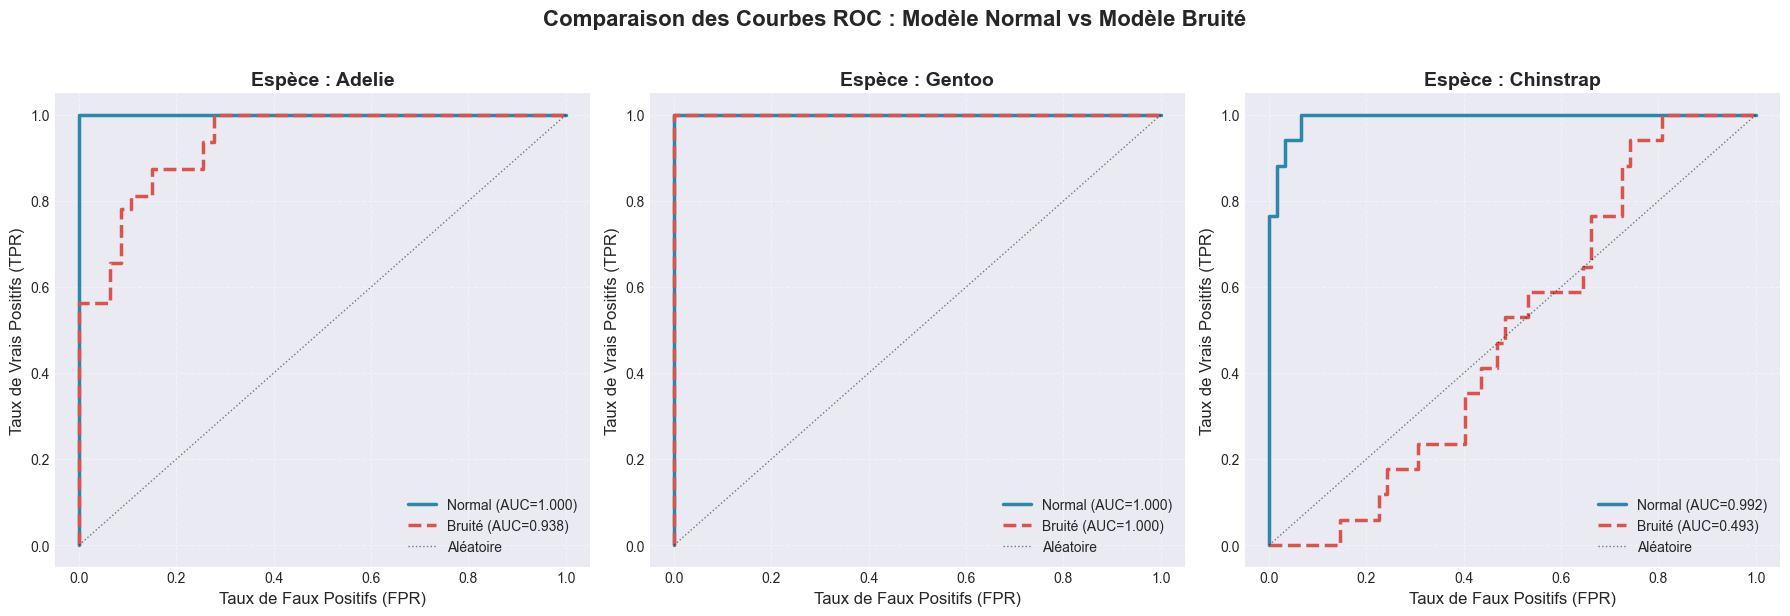

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Comparaison des Courbes ROC : Modèle Normal vs Modèle Bruité", 
             fontsize=16, fontweight='bold', y=1.02)

color_normal = '#2E86AB'  
color_noisy = '#D9534F'   

for i, species in enumerate(sp):
    ax = axes[i]
    
    # Courbe ROC "Normale"
    fpr_clean, tpr_clean = roc_curves_test[i]
    auc_clean = auc_test[i]
    ax.plot(fpr_clean, tpr_clean, color=color_normal, linewidth=2.5, 
            label=f'Normal (AUC={auc_clean:.3f})')
    
    # Courbe ROC "Bruitée" (Train & Test bruités)
    fpr_noisy, tpr_noisy = roc_curves_test_noisy2[i]
    auc_noisy = auc_test_noisy2[i]
    ax.plot(fpr_noisy, tpr_noisy, color=color_noisy, linewidth=2.5, linestyle='--', 
            label=f'Bruité (AUC={auc_noisy:.3f})')
    
    ax.plot([0, 1], [0, 1], 'k:', linewidth=1, alpha=0.5, label='Aléatoire')
    ax.set_title(f"Espèce : {species}", fontsize=14, fontweight='bold')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
    ax.legend(loc="lower right", fontsize=10, framealpha=0.9)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

plt.tight_layout()
plt.show()

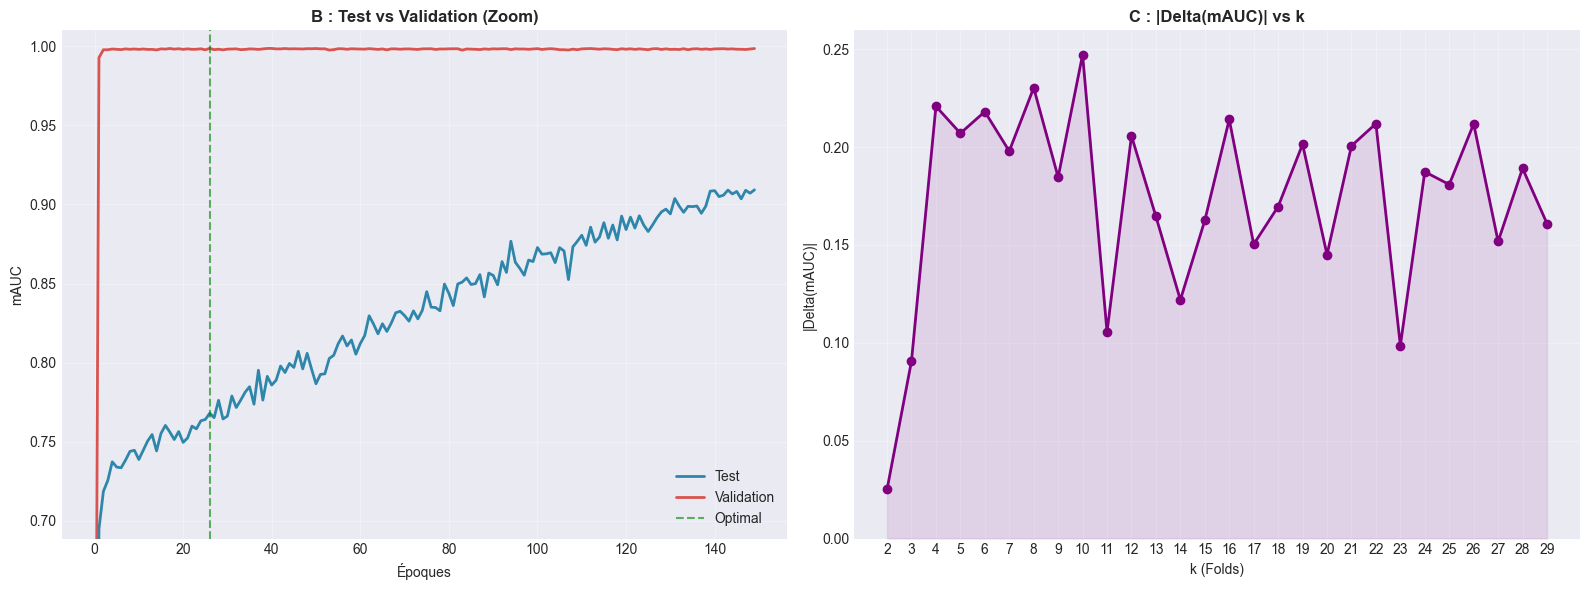

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def mAUC(X, Y, W):
    scores = np.dot(X, W)
    aucs = []
    for i in range(Y.shape[1]):
        _, _, auc = ROC(Y[:, i], scores[:, i])
        aucs.append(auc)
    return np.mean(aucs)

def add_feature_noise(X, amplitude=0.2, seed=None, per_feature=True):
    if seed is not None:
        np.random.seed(seed)
    if per_feature:
        noise = np.random.uniform(-amplitude, amplitude, size=(1, X.shape[1]))
        X_noisy = X * (1.0 + noise)
    else:
        noise = np.random.uniform(-amplitude, amplitude, size=X.shape)
        X_noisy = X * (1.0 + noise)
    return X_noisy

def k_fold_test_vs_valid(X_train, Y_train, X_test, Y_test, k, lr=0.008, epochs=20):
    N = len(X_train)
    fold_size = N // k
    n_features = X_train.shape[1]
    n_classes = Y_train.shape[1]
    
    sum_valid_auc = np.zeros(epochs)
    sum_test_auc = np.zeros(epochs)

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i != k - 1 else N
        
        val_idx = np.arange(start, end)
        train_idx = np.concatenate([np.arange(0, start), np.arange(end, N)])
        
        Xt, Xv = X_train[train_idx], X_train[val_idx]
        Yt, Yv = Y_train[train_idx], Y_train[val_idx]
        
        W = np.random.randn(n_features, n_classes) * (1 / np.sqrt(n_features))
        
        for e in range(epochs):
            sum_valid_auc[e] += mAUC(Xv, Yv, W)
            sum_test_auc[e] += mAUC(X_test, Y_test, W)
            
            perm = np.random.permutation(len(Xt))
            for idx in perm:
                x_s = Xt[idx]
                y_s = Yt[idx]
                pred = np.dot(x_s, W)
                err = y_s - pred
                W += lr * np.outer(x_s, err)
    
    return sum_valid_auc / k, sum_test_auc / k

X_noisy = add_feature_noise(entrees_perm, amplitude=1.2, seed=999, per_feature=True)
Y_noisy = sorties_perm

EPOCHS_B = 150
mean_valid_B, mean_test_B = k_fold_test_vs_valid(
    X_noisy, Y_noisy, X_test_noisy, Y_test_noisy, k=5, epochs=EPOCHS_B
)

k_values = range(2, 30)
deltas_C_abs = []
for k in k_values:
    m_valid, m_test = k_fold_test_vs_valid(X_noisy, Y_noisy, X_test_noisy, Y_test_noisy, k=k, epochs=20)
    best_epoch = np.argmax(m_valid)
    deltas_C_abs.append(abs(m_valid[best_epoch] - m_test[best_epoch]))


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
t = np.arange(EPOCHS_B)
plt.plot(t, mean_test_B, label='Test', color='#2E86AB', linewidth=2)
plt.plot(t, mean_valid_B, label='Validation', color='#D9534F', linewidth=2)

opt_idx = np.argmax(mean_valid_B)
plt.axvline(opt_idx, color='green', linestyle='--', alpha=0.6, label='Optimal')
y_min_zoom = min(np.min(mean_test_B[10:]), np.min(mean_valid_B[10:])) - 0.05
plt.ylim(max(0.4, y_min_zoom), 1.01)
plt.title("B : Test vs Validation (Zoom)", fontsize=12, fontweight='bold')
plt.xlabel("Époques")
plt.ylabel("mAUC")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_values, deltas_C_abs, marker='o', linestyle='-', color='purple', linewidth=2)
plt.fill_between(k_values, 0, deltas_C_abs, color='purple', alpha=0.1)
plt.ylim(bottom=0)
plt.title("C : |Delta(mAUC)| vs k", fontsize=12, fontweight='bold')
plt.xlabel("k (Folds)")
plt.ylabel("|Delta(mAUC)|")
plt.xticks(k_values)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [18]:
new_df = df.drop(columns=['island', 'sex', 'year'])


variance_df = new_df.groupby('species').std()
# print(variance_df)


moyenne_df = new_df.groupby('species').mean()
# print(moyenne_df)


# Bruit de mesure = ecart type calculé sur chaque mesure et chaque classe
# augmentation de données a partir des données de base avec un ajout aléatoire de valeur de max(ecarttype)
from scipy.stats import norm

liste_gain = [0.1 , 1, 10]
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


for species in variance_df.index:
    mask = new_df['species'] == species
    #std_espece = variance_df.loc[species]
    
    for col in features:
        sigma = variance_df.loc[species, col]  #Var par feature de l espece
        gain = np.random.uniform(0.1, 1.0)
        sigma_gain = sigma * gain
        noise = norm.rvs(loc=0, scale=sigma_gain, size=mask.sum()) # Gauss
        
        new_df.loc[mask, col] = new_df.loc[mask, col] + noise
        
# print(new_df)
        
        



## Courbes ROC avec les données augmentées avec bruit (Référence gain=0)


Adelie      :
  AUC (validation) : 0.8301   |   AUC (test) : 0.9867
  AP  (validation) : 0.7756   |   AP  (test) : 0.9783

Gentoo      :
  AUC (validation) : 0.9788   |   AUC (test) : 0.6864
  AP  (validation) : 0.9665   |   AP  (test) : 0.5066

Chinstrap   :
  AUC (validation) : 0.6846   |   AUC (test) : 0.7258
  AP  (validation) : 0.2833   |   AP  (test) : 0.2902
MAUC (validation) : 0.8312   |   MAUC (test) : 0.7996
MAP  (validation) : 0.6751   |   MAP  (test) : 0.5917


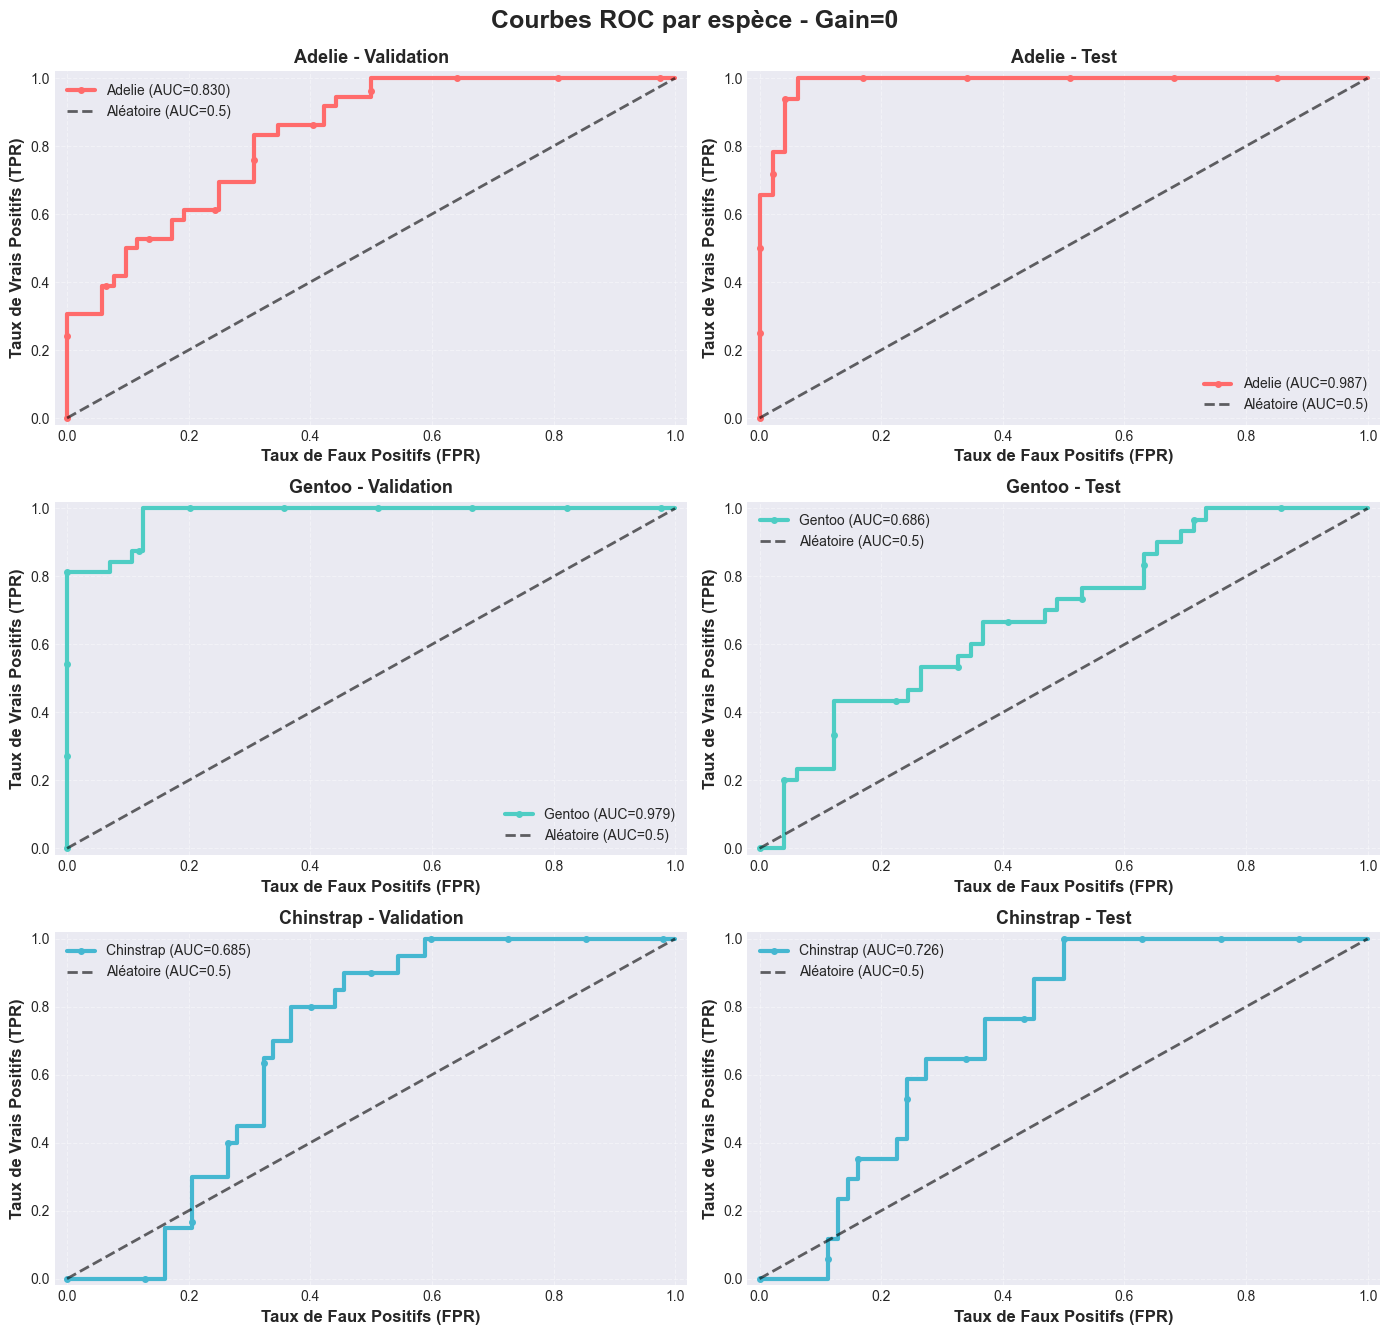

In [19]:
from scipy.stats import norm

df_features = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
variance_per_species = df.groupby('species')[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].std()
mean_per_species = df.groupby('species')[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].mean()

N_AUGMENTATION = 2
GAIN_MIN = 0
GAIN_MAX = 0

def augment_data(X_orig, Y_orig, species_labels, n_copies=2):
    X_augmented = [X_orig]
    Y_augmented = [Y_orig]
    
    for copy_idx in range(n_copies):
        X_noisy = X_orig.copy()
        
        for sample_idx in range(len(X_orig)):
            species_idx = species_labels[sample_idx]
            species_name = sp[species_idx]
            
            for feat_idx, feat_name in enumerate(["bill_length_mm", "bill_depth_mm", 
                                                    "flipper_length_mm", "body_mass_g"]):
                sigma = variance_per_species.loc[species_name, feat_name]
                gain = np.random.uniform(GAIN_MIN, GAIN_MAX)
                sigma_scaled = sigma * gain
                
                noise = norm.rvs(loc=0, scale=sigma_scaled)
                X_noisy[sample_idx, feat_idx] = X_orig[sample_idx, feat_idx] + noise
        
        X_augmented.append(X_noisy)
        Y_augmented.append(Y_orig.copy())
    
    return np.vstack(X_augmented), np.vstack(Y_augmented)

species_indices_perm = np.argmax(sorties_perm, axis=1)
species_train = species_indices_perm[:166]
species_valid = species_indices_perm[166:254]
species_test = species_indices_perm[254:]

entrees_train_orig = entrees[perm[:166], :]
entrees_valid_orig = entrees[perm[166:254], :]

X_train_aug_orig, Y_train_aug = augment_data(entrees_train_orig, Y_train, species_train, N_AUGMENTATION)
X_valid_aug_orig, Y_valid_aug = augment_data(entrees_valid_orig, Y_valid, species_valid, N_AUGMENTATION)

X_train_aug = (X_train_aug_orig - mu) / sigma
X_valid_aug = (X_valid_aug_orig - mu) / sigma

W_aug, err_train_aug = widrow_hoff(X_train_aug, Y_train_aug, taux_apprentissage=0.008, epochs=20)
scores_valid_aug = compute_scores(X_valid_aug, W_aug)
scores_test_aug = compute_scores(X_test, W_aug)

auc_valid_aug = []
auc_test_aug = []
ap_valid_aug = []
ap_test_aug = []

for i, species in enumerate(sp):
    fpr_v, tpr_v, auc_v = ROC(Y_valid_aug[:, i], scores_valid_aug[:, i])
    fpr_t, tpr_t, auc_t = ROC(Y_test[:, i], scores_test_aug[:, i])
    
    recall_v, prec_v, ap_v = PR(Y_valid_aug[:, i], scores_valid_aug[:, i])
    recall_t, prec_t, ap_t = PR(Y_test[:, i], scores_test_aug[:, i])
    
    auc_valid_aug.append(auc_v)
    auc_test_aug.append(auc_t)
    ap_valid_aug.append(ap_v)
    ap_test_aug.append(ap_t)
    
    print(f"\n{species:12s}:")
    print(f"  AUC (validation) : {auc_v:.4f}   |   AUC (test) : {auc_t:.4f}")
    print(f"  AP  (validation) : {ap_v:.4f}   |   AP  (test) : {ap_t:.4f}")

mauc_valid_aug = np.mean(auc_valid_aug)
mauc_test_aug = np.mean(auc_test_aug)
map_valid_aug = np.mean(ap_valid_aug)
map_test_aug = np.mean(ap_test_aug)

print(f"MAUC (validation) : {mauc_valid_aug:.4f}   |   MAUC (test) : {mauc_test_aug:.4f}")
print(f"MAP  (validation) : {map_valid_aug:.4f}   |   MAP  (test) : {map_test_aug:.4f}")

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

fig, axes = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle("Courbes ROC par espèce - Gain=0", fontsize=18, fontweight='bold', y=0.95)

roc_curves_valid_aug = []
roc_curves_test_aug = []

for i, species in enumerate(sp):
    fpr_v, tpr_v, _ = ROC(Y_valid_aug[:, i], scores_valid_aug[:, i])
    fpr_t, tpr_t, _ = ROC(Y_test[:, i], scores_test_aug[:, i])
    
    roc_curves_valid_aug.append((fpr_v, tpr_v))
    roc_curves_test_aug.append((fpr_t, tpr_t))
    
    ax = axes[i, 0]
    ax.plot(fpr_v, tpr_v, linewidth=3, label=f'{species} (AUC={auc_valid_aug[i]:.3f})',
            color=colors[i], marker='o', markersize=4, markevery=max(1, len(fpr_v)//10))
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Aléatoire (AUC=0.5)')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Validation', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])

    ax = axes[i, 1]
    ax.plot(fpr_t, tpr_t, linewidth=3, label=f'{species} (AUC={auc_test_aug[i]:.3f})',
            color=colors[i], marker='o', markersize=4, markevery=max(1, len(fpr_t)//10))
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Aléatoire (AUC=0.5)')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Test', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Courbes ROC avec les données augmentées avec bruit (gain entre 0 et 0.1)


Adelie      :
  AUC (validation) : 0.8273   |   AUC (test) : 0.8551
  AP  (validation) : 0.7713   |   AP  (test) : 0.7746

Gentoo      :
  AUC (validation) : 0.9799   |   AUC (test) : 0.6796
  AP  (validation) : 0.9682   |   AP  (test) : 0.6025

Chinstrap   :
  AUC (validation) : 0.6618   |   AUC (test) : 0.1537
  AP  (validation) : 0.2696   |   AP  (test) : 0.1176
MAUC (validation) : 0.8230   |   MAUC (test) : 0.5628
MAP  (validation) : 0.6697   |   MAP  (test) : 0.4982


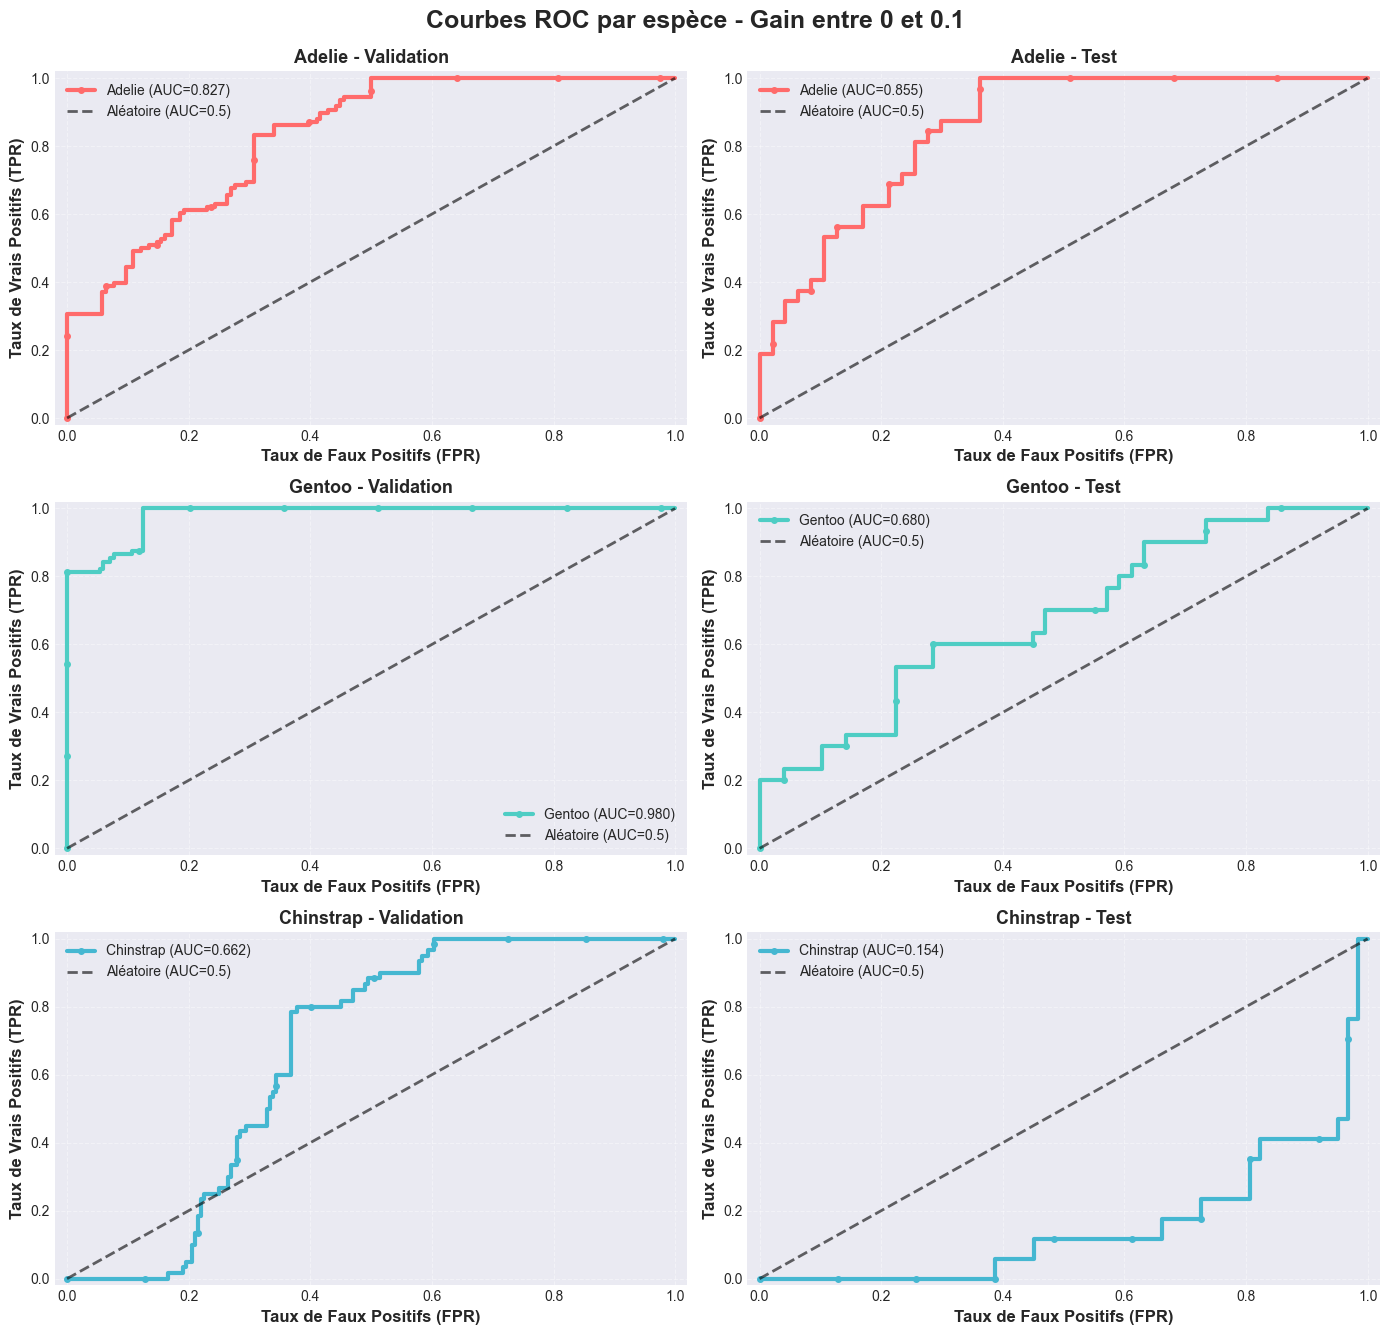

In [20]:
GAIN_MIN = 0
GAIN_MAX = 0.1

species_train = species_indices_perm[:166]
species_valid = species_indices_perm[166:254]
species_test = species_indices_perm[254:]

entrees_train_orig = entrees[perm[:166], :]
entrees_valid_orig = entrees[perm[166:254], :]

X_train_aug_orig, Y_train_aug = augment_data(entrees_train_orig, Y_train, species_train, N_AUGMENTATION)
X_valid_aug_orig, Y_valid_aug = augment_data(entrees_valid_orig, Y_valid, species_valid, N_AUGMENTATION)

X_train_aug = (X_train_aug_orig - mu) / sigma
X_valid_aug = (X_valid_aug_orig - mu) / sigma

W_aug, err_train_aug = widrow_hoff(X_train_aug, Y_train_aug, taux_apprentissage=0.008, epochs=20)
scores_valid_aug = compute_scores(X_valid_aug, W_aug)
scores_test_aug = compute_scores(X_test, W_aug)

auc_valid_aug = []
auc_test_aug = []
ap_valid_aug = []
ap_test_aug = []

for i, species in enumerate(sp):
    fpr_v, tpr_v, auc_v = ROC(Y_valid_aug[:, i], scores_valid_aug[:, i])
    fpr_t, tpr_t, auc_t = ROC(Y_test[:, i], scores_test_aug[:, i])
    
    recall_v, prec_v, ap_v = PR(Y_valid_aug[:, i], scores_valid_aug[:, i])
    recall_t, prec_t, ap_t = PR(Y_test[:, i], scores_test_aug[:, i])
    
    auc_valid_aug.append(auc_v)
    auc_test_aug.append(auc_t)
    ap_valid_aug.append(ap_v)
    ap_test_aug.append(ap_t)
    
    print(f"\n{species:12s}:")
    print(f"  AUC (validation) : {auc_v:.4f}   |   AUC (test) : {auc_t:.4f}")
    print(f"  AP  (validation) : {ap_v:.4f}   |   AP  (test) : {ap_t:.4f}")

mauc_valid_aug = np.mean(auc_valid_aug)
mauc_test_aug = np.mean(auc_test_aug)
map_valid_aug = np.mean(ap_valid_aug)
map_test_aug = np.mean(ap_test_aug)

print(f"MAUC (validation) : {mauc_valid_aug:.4f}   |   MAUC (test) : {mauc_test_aug:.4f}")
print(f"MAP  (validation) : {map_valid_aug:.4f}   |   MAP  (test) : {map_test_aug:.4f}")

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

fig, axes = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle("Courbes ROC par espèce - Gain entre 0 et 0.1", fontsize=18, fontweight='bold', y=0.95)

roc_curves_valid_aug = []
roc_curves_test_aug = []

for i, species in enumerate(sp):
    fpr_v, tpr_v, _ = ROC(Y_valid_aug[:, i], scores_valid_aug[:, i])
    fpr_t, tpr_t, _ = ROC(Y_test[:, i], scores_test_aug[:, i])
    
    roc_curves_valid_aug.append((fpr_v, tpr_v))
    roc_curves_test_aug.append((fpr_t, tpr_t))
    
    ax = axes[i, 0]
    ax.plot(fpr_v, tpr_v, linewidth=3, label=f'{species} (AUC={auc_valid_aug[i]:.3f})',
            color=colors[i], marker='o', markersize=4, markevery=max(1, len(fpr_v)//10))
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Aléatoire (AUC=0.5)')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Validation', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])

    ax = axes[i, 1]
    ax.plot(fpr_t, tpr_t, linewidth=3, label=f'{species} (AUC={auc_test_aug[i]:.3f})',
            color=colors[i], marker='o', markersize=4, markevery=max(1, len(fpr_t)//10))
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Aléatoire (AUC=0.5)')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Test', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Courbes ROC avec les données augmentées avec bruit (gain entre 0 et 10.0)


Adelie      :
  AUC (validation) : 0.6381   |   AUC (test) : 0.7320
  AP  (validation) : 0.5132   |   AP  (test) : 0.5166

Gentoo      :
  AUC (validation) : 0.7750   |   AUC (test) : 0.9857
  AP  (validation) : 0.6203   |   AP  (test) : 0.9749

Chinstrap   :
  AUC (validation) : 0.6363   |   AUC (test) : 0.6224
  AP  (validation) : 0.2839   |   AP  (test) : 0.2213
MAUC (validation) : 0.6831   |   MAUC (test) : 0.7801
MAP  (validation) : 0.4725   |   MAP  (test) : 0.5709


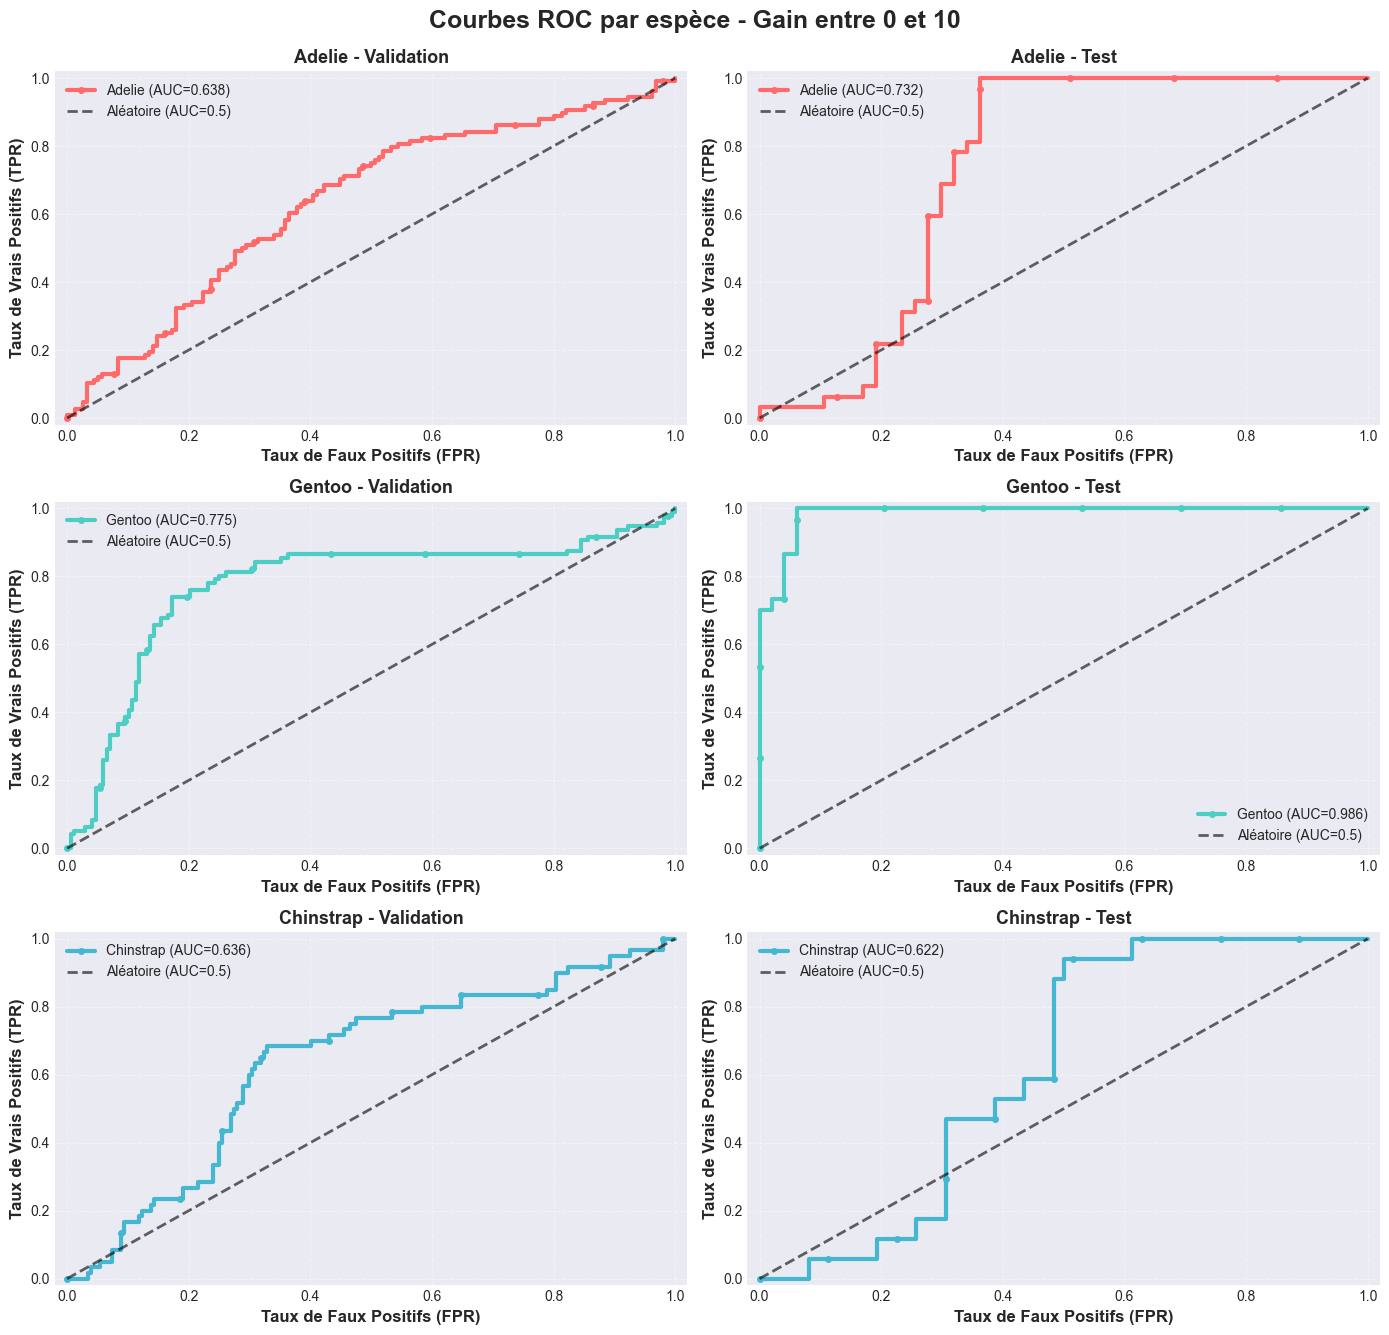

In [ ]:
GAIN_MIN = 0.0
GAIN_MAX = 10.0

species_indices_perm = np.argmax(sorties_perm, axis=1)
species_train = species_indices_perm[:166]
species_valid = species_indices_perm[166:254]
species_test = species_indices_perm[254:]

entrees_train_orig = entrees[perm[:166], :]
entrees_valid_orig = entrees[perm[166:254], :]

X_train_aug_orig, Y_train_aug = augment_data(entrees_train_orig, Y_train, species_train, N_AUGMENTATION)
X_valid_aug_orig, Y_valid_aug = augment_data(entrees_valid_orig, Y_valid, species_valid, N_AUGMENTATION)

X_train_aug = (X_train_aug_orig - mu) / sigma
X_valid_aug = (X_valid_aug_orig - mu) / sigma

W_aug, err_train_aug = widrow_hoff(X_train_aug, Y_train_aug, taux_apprentissage=0.008, epochs=20)
scores_valid_aug = compute_scores(X_valid_aug, W_aug)
scores_test_aug = compute_scores(X_test, W_aug)

auc_valid_aug = []
auc_test_aug = []
ap_valid_aug = []
ap_test_aug = []

for i, species in enumerate(sp):
    fpr_v, tpr_v, auc_v = ROC(Y_valid_aug[:, i], scores_valid_aug[:, i])
    fpr_t, tpr_t, auc_t = ROC(Y_test[:, i], scores_test_aug[:, i])
    
    recall_v, prec_v, ap_v = PR(Y_valid_aug[:, i], scores_valid_aug[:, i])
    recall_t, prec_t, ap_t = PR(Y_test[:, i], scores_test_aug[:, i])
    
    auc_valid_aug.append(auc_v)
    auc_test_aug.append(auc_t)
    ap_valid_aug.append(ap_v)
    ap_test_aug.append(ap_t)
    
    print(f"\n{species:12s}:")
    print(f"  AUC (validation) : {auc_v:.4f}   |   AUC (test) : {auc_t:.4f}")
    print(f"  AP  (validation) : {ap_v:.4f}   |   AP  (test) : {ap_t:.4f}")

mauc_valid_aug = np.mean(auc_valid_aug)
mauc_test_aug = np.mean(auc_test_aug)
map_valid_aug = np.mean(ap_valid_aug)
map_test_aug = np.mean(ap_test_aug)

print(f"MAUC (validation) : {mauc_valid_aug:.4f}   |   MAUC (test) : {mauc_test_aug:.4f}")
print(f"MAP  (validation) : {map_valid_aug:.4f}   |   MAP  (test) : {map_test_aug:.4f}")

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

fig, axes = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle("Courbes ROC par espèce - Gain entre 0 et 10", fontsize=18, fontweight='bold', y=0.95)

roc_curves_valid_aug = []
roc_curves_test_aug = []

for i, species in enumerate(sp):
    fpr_v, tpr_v, _ = ROC(Y_valid_aug[:, i], scores_valid_aug[:, i])
    fpr_t, tpr_t, _ = ROC(Y_test[:, i], scores_test_aug[:, i])
    
    roc_curves_valid_aug.append((fpr_v, tpr_v))
    roc_curves_test_aug.append((fpr_t, tpr_t))
    
    ax = axes[i, 0]
    ax.plot(fpr_v, tpr_v, linewidth=3, label=f'{species} (AUC={auc_valid_aug[i]:.3f})',
            color=colors[i], marker='o', markersize=4, markevery=max(1, len(fpr_v)//10))
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Aléatoire (AUC=0.5)')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Validation', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])

    ax = axes[i, 1]
    ax.plot(fpr_t, tpr_t, linewidth=3, label=f'{species} (AUC={auc_test_aug[i]:.3f})',
            color=colors[i], marker='o', markersize=4, markevery=max(1, len(fpr_t)//10))
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Aléatoire (AUC=0.5)')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Test', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Courbes ROC avec les données augmentées avec bruit (gain entre 0 et 100.0)

C:\Users\phand\AppData\Local\Temp\ipykernel_9916\1686724122.py:53: RuntimeWarning: overflow encountered in square
  somme_erreur += np.sum(erreur**2)
C:\Users\phand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\numeric.py:995: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
C:\Users\phand\AppData\Local\Temp\ipykernel_9916\1686724122.py:51: RuntimeWarning: invalid value encountered in add
  matrice_poids += taux_apprentissage * np.outer(x, erreur)
C:\Users\phand\AppData\Local\Temp\ipykernel_9916\1686724122.py:45: RuntimeWarning: invalid value encountered in dot
  y_pred = np.dot(x, matrice_poids)



Adelie      :
  AUC (validation) : 0.4961   |   AUC (test) : 0.5751
  AP  (validation) : 0.3936   |   AP  (test) : 0.4034

Gentoo      :
  AUC (validation) : 0.4877   |   AUC (test) : 0.3605
  AP  (validation) : 0.3606   |   AP  (test) : 0.2878

Chinstrap   :
  AUC (validation) : 0.5216   |   AUC (test) : 0.5873
  AP  (validation) : 0.2390   |   AP  (test) : 0.3605
MAUC (validation) : 0.5018   |   MAUC (test) : 0.5077
MAP  (validation) : 0.3311   |   MAP  (test) : 0.3506


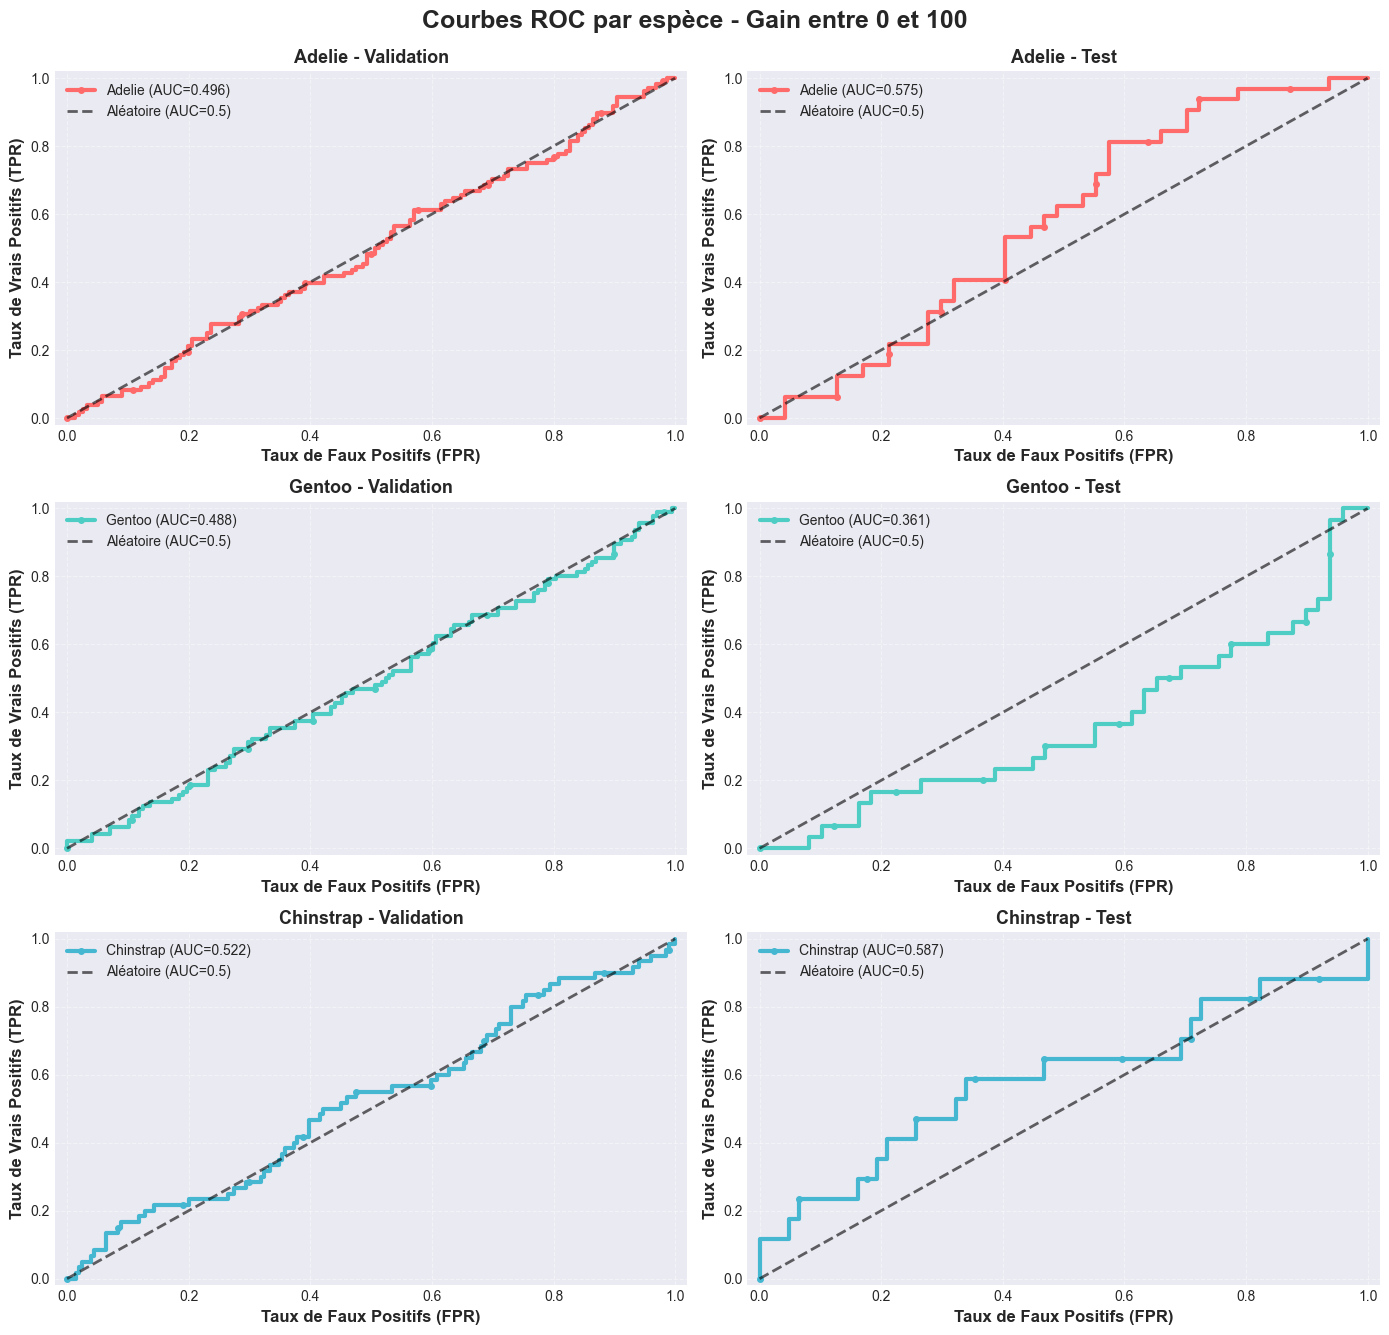

In [22]:
GAIN_MIN = 0.0
GAIN_MAX = 100.0

species_indices_perm = np.argmax(sorties_perm, axis=1)
species_train = species_indices_perm[:166]
species_valid = species_indices_perm[166:254]
species_test = species_indices_perm[254:]

entrees_train_orig = entrees[perm[:166], :]
entrees_valid_orig = entrees[perm[166:254], :]

X_train_aug_orig, Y_train_aug = augment_data(entrees_train_orig, Y_train, species_train, N_AUGMENTATION)
X_valid_aug_orig, Y_valid_aug = augment_data(entrees_valid_orig, Y_valid, species_valid, N_AUGMENTATION)

X_train_aug = (X_train_aug_orig - mu) / sigma
X_valid_aug = (X_valid_aug_orig - mu) / sigma

W_aug, err_train_aug = widrow_hoff(X_train_aug, Y_train_aug, taux_apprentissage=0.008, epochs=20)
scores_valid_aug = compute_scores(X_valid_aug, W_aug)
scores_test_aug = compute_scores(X_test, W_aug)

auc_valid_aug = []
auc_test_aug = []
ap_valid_aug = []
ap_test_aug = []

for i, species in enumerate(sp):
    fpr_v, tpr_v, auc_v = ROC(Y_valid_aug[:, i], scores_valid_aug[:, i])
    fpr_t, tpr_t, auc_t = ROC(Y_test[:, i], scores_test_aug[:, i])
    
    recall_v, prec_v, ap_v = PR(Y_valid_aug[:, i], scores_valid_aug[:, i])
    recall_t, prec_t, ap_t = PR(Y_test[:, i], scores_test_aug[:, i])
    
    auc_valid_aug.append(auc_v)
    auc_test_aug.append(auc_t)
    ap_valid_aug.append(ap_v)
    ap_test_aug.append(ap_t)
    
    print(f"\n{species:12s}:")
    print(f"  AUC (validation) : {auc_v:.4f}   |   AUC (test) : {auc_t:.4f}")
    print(f"  AP  (validation) : {ap_v:.4f}   |   AP  (test) : {ap_t:.4f}")

mauc_valid_aug = np.mean(auc_valid_aug)
mauc_test_aug = np.mean(auc_test_aug)
map_valid_aug = np.mean(ap_valid_aug)
map_test_aug = np.mean(ap_test_aug)

print(f"MAUC (validation) : {mauc_valid_aug:.4f}   |   MAUC (test) : {mauc_test_aug:.4f}")
print(f"MAP  (validation) : {map_valid_aug:.4f}   |   MAP  (test) : {map_test_aug:.4f}")

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

fig, axes = plt.subplots(3, 2, figsize=(14, 14))
fig.suptitle("Courbes ROC par espèce - Gain entre 0 et 100", fontsize=18, fontweight='bold', y=0.95)

roc_curves_valid_aug = []
roc_curves_test_aug = []

for i, species in enumerate(sp):
    fpr_v, tpr_v, _ = ROC(Y_valid_aug[:, i], scores_valid_aug[:, i])
    fpr_t, tpr_t, _ = ROC(Y_test[:, i], scores_test_aug[:, i])
    
    roc_curves_valid_aug.append((fpr_v, tpr_v))
    roc_curves_test_aug.append((fpr_t, tpr_t))
    
    ax = axes[i, 0]
    ax.plot(fpr_v, tpr_v, linewidth=3, label=f'{species} (AUC={auc_valid_aug[i]:.3f})',
            color=colors[i], marker='o', markersize=4, markevery=max(1, len(fpr_v)//10))
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Aléatoire (AUC=0.5)')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Validation', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])

    ax = axes[i, 1]
    ax.plot(fpr_t, tpr_t, linewidth=3, label=f'{species} (AUC={auc_test_aug[i]:.3f})',
            color=colors[i], marker='o', markersize=4, markevery=max(1, len(fpr_t)//10))
    ax.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.6, label='Aléatoire (AUC=0.5)')
    ax.set_xlabel('Taux de Faux Positifs (FPR)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Taux de Vrais Positifs (TPR)', fontsize=12, fontweight='bold')
    ax.set_title(f'{species} - Test', fontsize=13, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
import pandas as pd
import numpy as np

GAIN_VALUES = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
results_list = []

print(f"{'Gain Max':<10} | {'Espèce':<12} | {'AUC Valid':<10} | {'AUC Test':<10}")
print("-" * 52)

for g_max in GAIN_VALUES:
    X_train_raw, Y_train_aug = augment_data(entrees_train_orig, Y_train, species_train, n_copies=2)
    X_valid_raw, Y_valid_aug = augment_data(entrees_valid_orig, Y_valid, species_valid, n_copies=2)

    mu_aug = X_train_raw.mean(axis=0)
    sigma_aug = X_train_raw.std(axis=0)
    sigma_aug[sigma_aug == 0] = 1e-8

    X_train_norm = (X_train_raw - mu_aug) / sigma_aug
    X_valid_norm = (X_valid_raw - mu_aug) / sigma_aug
    X_test_norm = (entrees[perm[254:], :] - mu_aug) / sigma_aug

    W_aug, _ = widrow_hoff(X_train_norm, Y_train_aug, taux_apprentissage=0.005, epochs=20)
    auc_v = compute_scores(X_valid_norm, W_aug)
    auc_t = compute_scores(X_test_norm, W_aug)

    for i, species in enumerate(sp):
        _, _, auc_v = ROC(Y_valid_aug[:, i], auc_v[:, i])
        _, _, auc_t = ROC(Y_test[:, i], auc_t[:, i])
        
        results_list.append({'Gain': g_max, 'Espèce': species, 'AUC_V': auc_v, 'AUC_T': auc_t})
        print(f"{g_max:<10.1f} | {species:<12} | {auc_v:.4f}     | {auc_t:.4f}")

Gain Max   | Espèce       | AUC Valid  | AUC Test  
----------------------------------------------------
0.1        | Adelie       | 0.5682     | 0.9628
0.1        | Gentoo       | 0.5990     | 1.0000
0.1        | Chinstrap    | 0.5475     | 0.5417
0.5        | Adelie       | 0.5570     | 0.8770
0.5        | Gentoo       | 0.6152     | 1.0000
0.5        | Chinstrap    | 0.5417     | 0.6120
1.0        | Adelie       | 0.5053     | 0.7872
1.0        | Gentoo       | 0.5009     | 0.7327
1.0        | Chinstrap    | 0.5212     | 0.7723
2.0        | Adelie       | 0.5042     | 0.8331
2.0        | Gentoo       | 0.5451     | 0.9932
2.0        | Chinstrap    | 0.5379     | 0.7713
5.0        | Adelie       | 0.5376     | 0.5811
5.0        | Gentoo       | 0.4302     | 0.0796
5.0        | Chinstrap    | 0.5042     | 0.6082
10.0       | Adelie       | 0.6322     | 0.9608
10.0       | Gentoo       | 0.5830     | 0.9109
10.0       | Chinstrap    | 0.4672     | 0.5190


Ou g petit (entre 0.1 à 0.5) : 
On observe que cela est bénéfique, les AUC sont meilleurs. Donc cela renforce la robustesse sans dénaturer.

Pour g grand (> 0.5 ) :
On des prédictions qui vont jusqu'à l'aléatoire. Il y a destruction du signal.


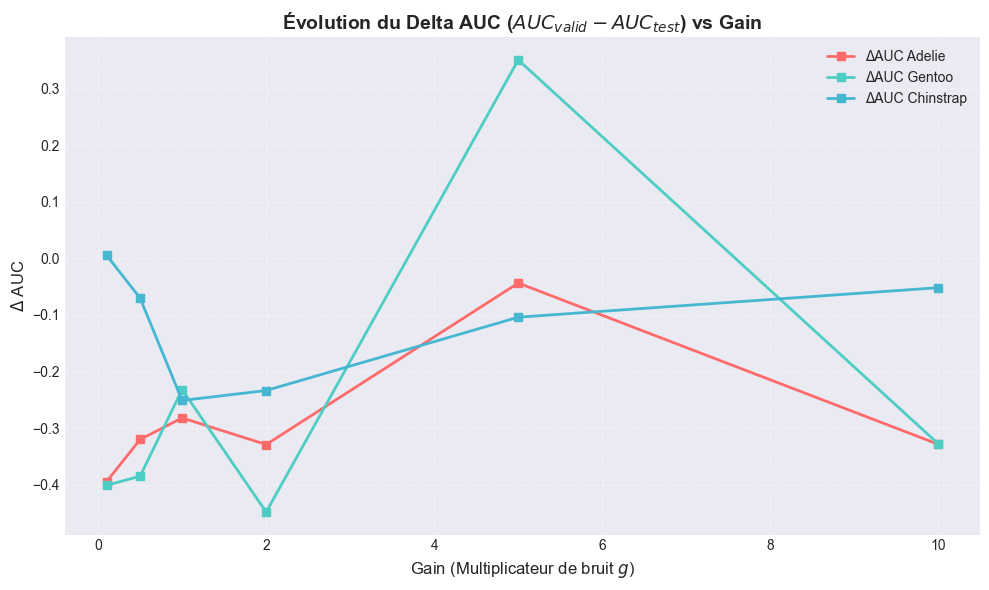

In [28]:
import matplotlib.pyplot as plt

df_results = pd.DataFrame(results_list)
df_results['Delta_AUC'] = df_results['AUC_V'] - df_results['AUC_T']
plt.figure(figsize=(10, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, species in enumerate(sp):
    species_data = df_results[df_results['Espèce'] == species]
    
    plt.plot(species_data['Gain'], species_data['Delta_AUC'], 
             marker='s', linewidth=2, label=f'ΔAUC {species}', color=colors[i])


plt.title("Évolution du Delta AUC ($AUC_{valid} - AUC_{test}$) vs Gain", fontsize=14, fontweight='bold')
plt.xlabel("Gain (Multiplicateur de bruit $g$)", fontsize=12)
plt.ylabel("$\Delta$ AUC", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()